# 1

#### 用来作图的函数，效果不好，可以不用这个

In [105]:
# -*- coding:utf-8 -*-
import networkx as nx
import matplotlib.pyplot as plt


def draw_net(vertex_list, edge_list, title_):
    # 创建DAG
    G = nx.DiGraph()

    # 顶点列表
    vertex_list = vertex_list
    # 添加顶点
    G.add_nodes_from(vertex_list)

    # 边列表
    edge_list = edge_list
    """
    [            ('v1', 'v5'), ('v1', 'v6'), ('v1', 'v7'),('v1', 'v8'),('v1', 'v9'),
                 ('v2', 'v5'), ('v2', 'v6'), ('v2', 'v7'),('v2', 'v8'),('v2', 'v9'),
                 ('v3', 'v5'), ('v3', 'v6'), ('v3', 'v7'),('v3', 'v8'),('v3', 'v9'),
                 ('v4', 'v5'), ('v4', 'v6'), ('v4', 'v7'),('v4', 'v8'),('v4', 'v9'),
                 ('v5','v10'),('v5','v11'),('v5','v12'),('v5','v13'),('v5','v14'),('v5','v15'),
                 ('v6','v10'),('v6','v11'),('v6','v12'),('v6','v13'),('v6','v14'),('v6','v15'),
                 ('v7','v10'),('v7','v11'),('v7','v12'),('v7','v13'),('v7','v14'),('v7','v15'),
                 ('v8','v10'),('v8','v11'),('v8','v12'),('v8','v13'),('v8','v14'),('v8','v15'),
                 ('v9','v10'),('v9','v11'),('v9','v12'),('v9','v13'),('v9','v14'),('v9','v15'),
                 ('v10','v16'),('v10','v17'),('v10','v18'),
                 ('v11','v16'),('v11','v17'),('v11','v18'),
                 ('v12','v16'),('v12','v17'),('v12','v18'),
                 ('v13','v16'),('v13','v17'),('v13','v18'),
                 ('v14','v16'),('v14','v17'),('v14','v18'),
                 ('v15','v16'),('v15','v17'),('v15','v18'),
                 ('v16','v19'),
                 ('v17','v20'),
                 ('v18','v21')
                
                ]"""
    # 通过列表形式来添加边
    G.add_edges_from(edge_list)

    plt.figure(dpi=128, figsize=(8, 6))
    
    # 绘制DAG图
    plt.title(title_)    #图片标题

    nx.draw(
            G,
            node_color = 'red',             # 顶点颜色
            edge_color = 'black',           # 边的颜色
            with_labels = True,             # 显示顶点标签
            font_size =10,                  # 文字大小
            node_size =300                  # 顶点大小
           )
    # 显示图片
    plt.show()

#### 建边

edge的值由三部分组成：part1是起源点value，part2是17个SDG之间的corr，part3是similarity即语义相似度

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix # 混淆矩阵
from scipy import stats
from sklearn import preprocessing
plt.rc("font",family='YouYuan')
import warnings
warnings.filterwarnings("ignore")
from matplotlib import rcParams
names = ['No poverty', 'Zero Hunger', 'Good Health', 'Quality Education', 'Gender Equality', 'Sanitation', 'Energy', 'Economic Growth', 'Infrastructure', 'Inequalities', 'Sustainable cities', 'Consumption', 'Climate', 'Life Under Water', 'Life on Land', 'good governance', 'Partnerships']


#### 建边的第一个要素：节点的value 30%

In [107]:
# part1 value 30%
value = [15.82845047, 16.45081949, 10.05025103, 17.69212932, 17.74135749, 48.25421134, 12.39294267, 42.58506202, 30.06107444, 95.02563012, 104.64372261, 10.746764,
31.50222957, 35.48243554, 9.91130964, 4.01674227, 197.22222222]
value_arr = np.zeros([17, 17])
for i in range(17):
    for j in range(17):
        value_arr[i][j] = np.round(value[i], 3)
pd.DataFrame(value_arr, columns=names, index=names)

,No poverty,Zero Hunger,Good Health,Quality Education,Gender Equality,Sanitation,Energy,Economic Growth,Infrastructure,Inequalities,Sustainable cities,Consumption,Climate,Life Under Water,Life on Land,good governance,Partnerships
No poverty,15.828,15.828,15.828,15.828,15.828,15.828,15.828,15.828,15.828,15.828,15.828,15.828,15.828,15.828,15.828,15.828,15.828
Zero Hunger,16.451,16.451,16.451,16.451,16.451,16.451,16.451,16.451,16.451,16.451,16.451,16.451,16.451,16.451,16.451,16.451,16.451
Good Health,10.050,10.050,10.050,10.050,10.050,10.050,10.050,10.050,10.050,10.050,10.050,10.050,10.050,10.050,10.050,10.050,10.050
Quality Education,17.692,17.692,17.692,17.692,17.692,17.692,17.692,17.692,17.692,17.692,17.692,17.692,17.692,17.692,17.692,17.692,17.692
Gender Equality,17.741,17.741,17.741,17.741,17.741,17.741,17.741,17.741,17.741,17.741,17.741,17.741,17.741,17.741,17.741,17.741,17.741
Sanitation,48.254,48.254,48.254,48.254,48.254,48.254,48.254,48.254,48.254,48.254,48.254,48.254,48.254,48.254,48.254,48.254,48.254
Energy,12.393,12.393,12.393,12.393,12.393,12.393,12.393,12.393,12.393,12.393,12.393,12.393,12.393,12.393,12.393,12.393,12.393
Economic Growth,42.585,42.585,42.585,42.585,42.585,42.585,42.585,42.585,42.585,42.585,42.585,42.585,42.585,42.585,42.585,42.585,42.585
Infrastructure,30.061,30.061,30.061,30.061,30.061,30.061,30.061,30.061,30.061,30.061,30.061,30.061,30.061,30.061,30.061,30.061,30.061
Inequalities,95.026,95.026,95.026,95.026,95.026,95.026,95.026,95.026,95.026,95.026,95.026,95.026,95.026,95.026,95.026,95.026,95.026


#### 建边的第二个要素：corr 40% 同时用作filter，这里的归一化方式改为按列的: normalized_data = data / mean(data), 于是理论上值会徘徊在1附近

In [108]:
# part2 corr 40% (also filter)
df = pd.read_excel('data.xlsx')
df = df.apply(lambda x: x / np.mean(x), axis=0)
# df = df.apply(np.log, axis=0)
df

,Unnamed: 0,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,0.994530,1.719955,NaN,0.959316,0.937838,NaN,1.133292,0.934395,1.038395,NaN,NaN,0.544804,NaN,0.777363,NaN,NaN,0.866555,0.435144
1,0.995027,1.672671,NaN,0.964300,0.947098,NaN,1.118495,0.930234,1.034024,NaN,NaN,0.546510,NaN,0.790637,NaN,NaN,0.872426,0.421537
2,0.995525,1.589924,NaN,0.968248,0.954738,NaN,1.104019,0.947569,1.028198,NaN,NaN,0.567455,NaN,0.801230,NaN,NaN,0.794996,0.442591
3,0.996022,1.507177,NaN,0.972165,0.963092,NaN,1.089865,0.954608,1.024751,NaN,NaN,0.632239,NaN,0.838368,NaN,NaN,0.746569,0.512314
4,0.996519,1.394878,NaN,0.975777,0.969124,NaN,1.076193,0.957096,1.024928,0.515408,NaN,0.703401,NaN,0.876464,NaN,NaN,0.750731,0.622434
5,0.997016,1.282578,NaN,0.980548,0.978088,1.038157,1.062682,0.962974,1.024683,0.590646,NaN,0.757159,0.994923,0.908957,NaN,NaN,0.707553,0.707797
6,0.997514,1.235294,NaN,0.985816,0.983444,1.028779,1.048689,0.971439,1.023097,0.642811,NaN,0.810531,0.977610,0.938419,NaN,NaN,0.779013,0.815870
7,0.998011,1.158458,NaN,0.989572,0.994484,1.026097,1.035822,0.977325,1.021972,0.725852,NaN,0.905492,0.989006,0.973759,NaN,NaN,0.867521,0.948551
8,0.998508,1.111174,NaN,0.991993,1.012246,1.026097,1.023115,0.984848,1.016923,0.778240,NaN,0.988863,0.986874,0.981284,NaN,NaN,0.824443,1.084219
9,0.999005,1.057979,NaN,0.997594,1.020198,1.024674,1.010730,0.989254,1.004868,0.821599,NaN,0.953132,0.986154,0.970397,NaN,NaN,0.824533,0.874724


#### 原始的方法，直接17个向量彼此计算Corr

In [109]:
# corr: 取2016-2020年的数据计算样本Correlation
data = df.iloc[[16, 17, 18, 19, 20]]
positive = [1, 2, 10, 13, 16]
negative = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 17]
# print(data)
corr_arr = np.zeros([17, 17])
for i in range(1, 18):
    for j in range(1, 18):
        x = data['SDG' + str(i)].values
        y = data['SDG' + str(j)].values
        sample_cov = sum([(i - np.mean(x)) * (j - np.mean(y)) for i, j in zip(x, y)]) / 4
        corr = sample_cov / (np.std(x, ddof = 1) * np.std(y, ddof = 1))
        if (i in positive and j in negative) or (j in positive and i in negative):
            corr = - corr
        corr_arr[i-1][j-1] = corr

In [110]:
threshold = 0.7
real_corr = np.where((np.abs(corr_arr) > threshold), corr_arr, np.nan)
pd.DataFrame(real_corr, columns=names, index=names)

,No poverty,Zero Hunger,Good Health,Quality Education,Gender Equality,Sanitation,Energy,Economic Growth,Infrastructure,Inequalities,Sustainable cities,Consumption,Climate,Life Under Water,Life on Land,good governance,Partnerships
No poverty,1.000000,-0.721420,NaN,0.841037,NaN,-0.939679,0.997215,NaN,0.823901,0.952219,0.831813,0.842946,-0.875967,0.935931,0.958706,-0.919313,NaN
Zero Hunger,-0.721420,1.000000,NaN,-0.967415,-0.781281,0.913395,-0.751887,0.969054,-0.803025,NaN,NaN,-0.884201,0.944836,-0.724112,-0.769779,NaN,NaN
Good Health,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.766146,NaN,NaN,NaN,NaN,NaN,0.867508
Quality Education,0.841037,-0.967415,NaN,1.000000,0.868653,-0.962026,0.866103,-0.884687,0.899779,NaN,NaN,0.967355,-0.957671,0.774740,0.832570,NaN,NaN
Gender Equality,NaN,-0.781281,NaN,0.868653,1.000000,-0.736448,NaN,NaN,0.888567,NaN,NaN,0.933097,-0.714422,NaN,NaN,NaN,NaN
Sanitation,-0.939679,0.913395,NaN,-0.962026,-0.736448,1.000000,-0.952194,0.848713,-0.863676,-0.801446,NaN,-0.914992,0.980244,-0.915990,-0.947611,0.790831,NaN
Energy,0.997215,-0.751887,NaN,0.866103,NaN,-0.952194,1.000000,NaN,0.861019,0.934459,0.810002,0.860936,-0.900167,0.925611,0.949365,-0.901032,NaN
Economic Growth,NaN,0.969054,NaN,-0.884687,NaN,0.848713,NaN,1.000000,NaN,NaN,NaN,-0.744853,0.916248,-0.700796,-0.718274,NaN,NaN
Infrastructure,0.823901,-0.803025,NaN,0.899779,0.888567,-0.863676,0.861019,NaN,1.000000,0.714500,NaN,0.899286,-0.870630,NaN,0.701814,NaN,NaN
Inequalities,0.952219,NaN,NaN,NaN,NaN,-0.801446,0.934459,NaN,0.714500,1.000000,0.942699,0.751091,NaN,0.838873,0.869517,-0.898924,0.760566


# CCA: 典型相关分析

#### 细化表示下的corr，CCA（典型相关分析）：

In [111]:
df1 = pd.read_excel('data_.xlsx', index_col=0)
df1 = df1.apply(lambda x: x / np.mean(x), axis=0)
df1

,SDG1.1,SDG1.2,SDG2.1,SDG2.2,SDG3.1,SDG3.2,SDG4.1,SDG4.2,SDG5.1,SDG5.2,...,SDG13.1,SDG13.2,SDG14.1,SDG14.2,SDG15.1,SDG15.2,SDG16.1,SDG16.2,SDG17.1,SDG17.2
2016,1.113689,1.153846,1.009309,0.965347,1.027304,0.996971,0.969162,0.973950,0.999343,0.954132,...,0.963198,0.548824,0.760490,0.719453,0.984952,0.988445,0.892258,1.015170,0.897258,0.888451
2017,1.055684,1.054945,0.999510,0.940594,1.010239,0.999725,0.984301,0.986804,0.992091,0.974793,...,0.977666,0.912567,1.005245,0.889123,0.998632,0.997065,1.005501,1.001663,0.989144,0.956593
2018,0.997680,0.978022,0.965213,0.952970,1.003413,1.002479,0.999674,0.999829,0.999343,0.995868,...,1.000269,0.906217,0.996503,1.089044,0.998632,1.003122,1.026162,1.007897,1.083560,1.031870
2019,0.939675,0.923077,0.984811,0.990099,0.982935,1.005233,1.015512,1.013025,1.003541,1.018182,...,1.001863,0.910651,1.057692,1.140997,1.005472,1.005684,1.031684,1.005819,1.065307,1.066180
2020,0.893271,0.890110,1.041156,1.150990,0.976109,0.995594,1.031350,1.026392,1.005682,1.057025,...,1.057003,1.721740,1.180070,1.161384,1.012312,1.005684,1.044395,0.969451,0.964731,1.056906


In [112]:
import numpy as np
from sklearn.cross_decomposition import CCA

headers = ['SDG1.', 'SDG2.', 'SDG3.', 'SDG4.', 'SDG5.', 'SDG6.', 'SDG7.', 'SDG8.', 'SDG9.', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14', 'SDG15', 'SDG16', 'SDG17']
cca_corr = np.zeros([17, 17])
for k in range(17):
    for g in range(17):
        
        df_1 = df1.iloc[:, [True if i[:5] == headers[k] else False for i in df1.columns]]
        df_2 = df1.iloc[:, [True if i[:5] == headers[g] else False for i in df1.columns]]
        X = df_1.values
        Y = df_2.values

        cca = CCA(n_components=1)
        cca.fit(X, Y)
        X_train_r, Y_train_r = cca.transform(X, Y)
        cca_corr[k][g] = np.corrcoef(X_train_r[:, 0], Y_train_r[:, 0])[0, 1]
pd.DataFrame(cca_corr)
real_corr = real_corr * cca_corr

此时real_corr为：(4.2.2的最终矩阵)

In [113]:
pd.DataFrame(real_corr)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,-0.698034,NaN,0.840942,NaN,-0.936698,0.995422,NaN,0.823555,0.928023,0.830155,0.836878,-0.842382,0.935012,0.958670,-0.915499,NaN
1,-0.698038,1.000000,NaN,-0.910735,-0.764638,0.877675,-0.732648,0.969025,-0.796773,NaN,NaN,-0.875720,0.944709,-0.711956,-0.768246,NaN,NaN
2,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.759749,NaN,NaN,NaN,NaN,NaN,0.860778
3,0.840942,-0.765521,NaN,1.000000,0.861637,-0.960115,0.862678,-0.843907,0.874331,NaN,NaN,0.950410,-0.913338,0.766174,0.815024,NaN,NaN
4,NaN,-0.764638,NaN,0.861637,1.000000,-0.736235,NaN,NaN,0.884445,NaN,NaN,0.927893,-0.699666,NaN,NaN,NaN,NaN
5,-0.936698,0.867487,NaN,-0.960115,-0.736235,1.000000,-0.952194,0.828814,-0.829126,-0.801336,NaN,-0.886813,0.968508,-0.912489,-0.920608,0.787502,NaN
6,0.995422,-0.732648,NaN,0.862679,NaN,-0.952194,1.000000,NaN,0.847834,0.892300,0.809977,0.858553,-0.882008,0.925447,0.946437,-0.900787,NaN
7,NaN,0.969025,NaN,-0.844355,NaN,0.828814,NaN,1.000000,NaN,NaN,NaN,-0.733983,0.878466,-0.549634,-0.609779,NaN,NaN
8,0.823555,-0.796774,NaN,0.874448,0.884445,-0.829126,0.847834,NaN,1.000000,0.655329,NaN,0.886451,-0.867558,NaN,0.654854,NaN,NaN
9,0.928023,NaN,NaN,NaN,NaN,-0.801339,0.892300,NaN,0.655330,1.000000,0.934121,0.740209,NaN,0.826826,0.850306,-0.832131,0.751186


#### 热力图函数

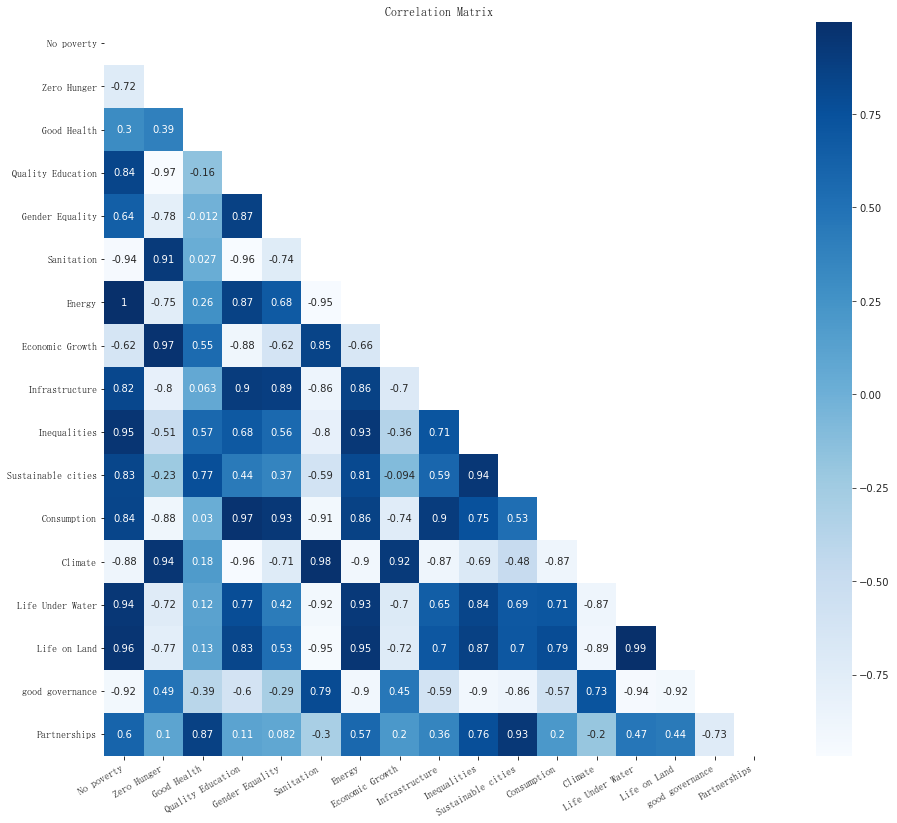

In [114]:
def HeatMap(DataFrame):
    
    import seaborn as sns
    colormap = plt.cm.hsv
    ylabels = DataFrame.columns.values.tolist()
    f, ax = plt.subplots(figsize=(15, 15))
    ax.set_title('Correlation Matrix')
    mask = np.zeros_like(DataFrame)
    mask[np.triu_indices_from(mask)] = True  # True:上三角矩阵 False:方阵
 
    with sns.axes_style("white"):
        sns.heatmap(DataFrame,
                    cmap="Blues", # 可选: Greys, Purples, Blues, Greens, Oranges, Reds, YlOrBr, ... ,
                    annot=True,
                    mask=mask,
                    )
    f.autofmt_xdate()
df = pd.DataFrame(corr_arr, columns=names, index=names)
HeatMap(df)

#### 建边的第三个要素：similarity矩阵 30%

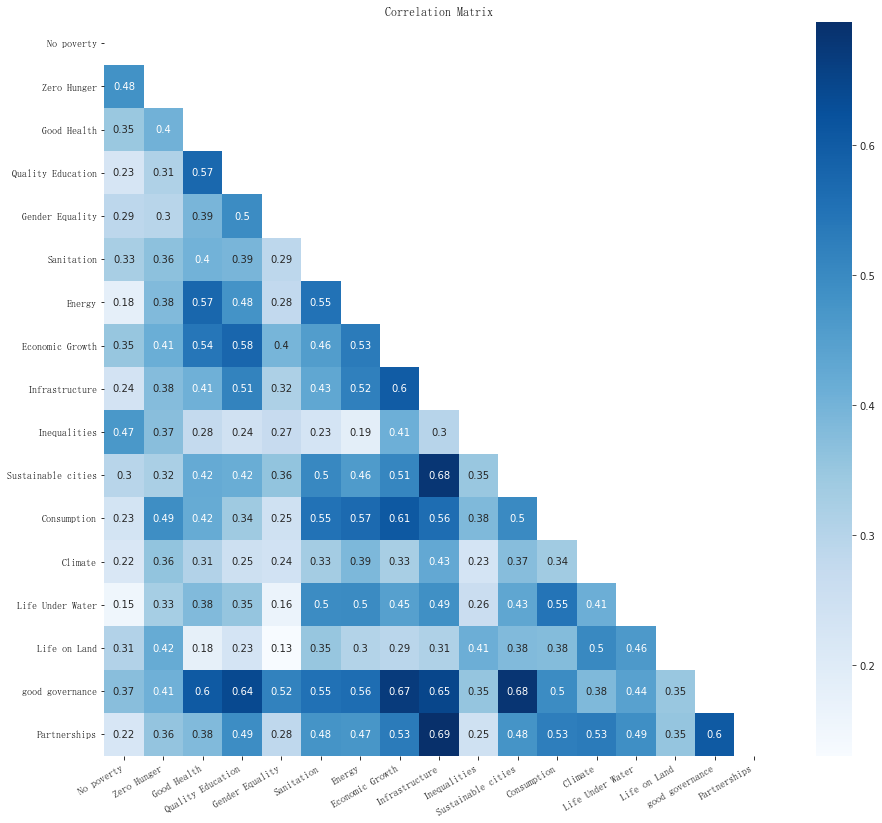

In [115]:
# part3 similarity 30%
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util

# Download model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# The sentences we'd like to compute similarity about
sentences = [
'End poverty in all its forms everywhere.',
'End hunger, achieve food security and improved nutrition and promote sustainable agriculture.',
'Ensure healthy lives and promote well-being for all at all ages.',
'Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all.',
'Achieve gender equality and empower all women and girls.',
'Ensure availability and sustainable management of water and sanitation for all.',
'Ensure access to affordable, reliable, sustainable and modern energy for all.',
'Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all.',
'Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation.',
'Reduce inequality within and among countries.',
'Make cities and human settlements inclusive, safe, resilient and sustainable.',
'Ensure sustainable consumption and production patterns.',
'Take urgent action to combat climate change and its impacts.',
'Conserve and sustainably use the oceans, seas and marine resources for sustainable development.',
'Protect, restore and promote sustainable use of terrestrial ecosystems, sustainably manage forests, combat desertification, and halt and reverse land degradation and halt biodiversity loss.',
'Promote peaceful and inclusive societies for sustainable development, provide access to justice for all and build effective, accountable and inclusive institutions at all levels.',
'Strengthen the means of implementation and revitalize the Global Partnership for Sustainable Development.'
]

# Get embeddings of sentences
embeddings = model.encode(sentences)

# Compute similarities
import numpy as np
arr = np.zeros([17, 17])
for i in range(17):
    for j in range(17):
        sim = util.cos_sim(embeddings[i], embeddings[j])
        num = "{0:.4f}".format(sim.tolist()[0][0])
        arr[i][j] = num

HeatMap(pd.DataFrame(arr, columns=names, index=names))

#### 聚类模型（kmeans）：

In [116]:
gni = pd.read_csv('GNI.csv')
gini = gni[gni['year'] == 2018]['value'].values
country = gni[gni['year'] == 2018]['country name'].values

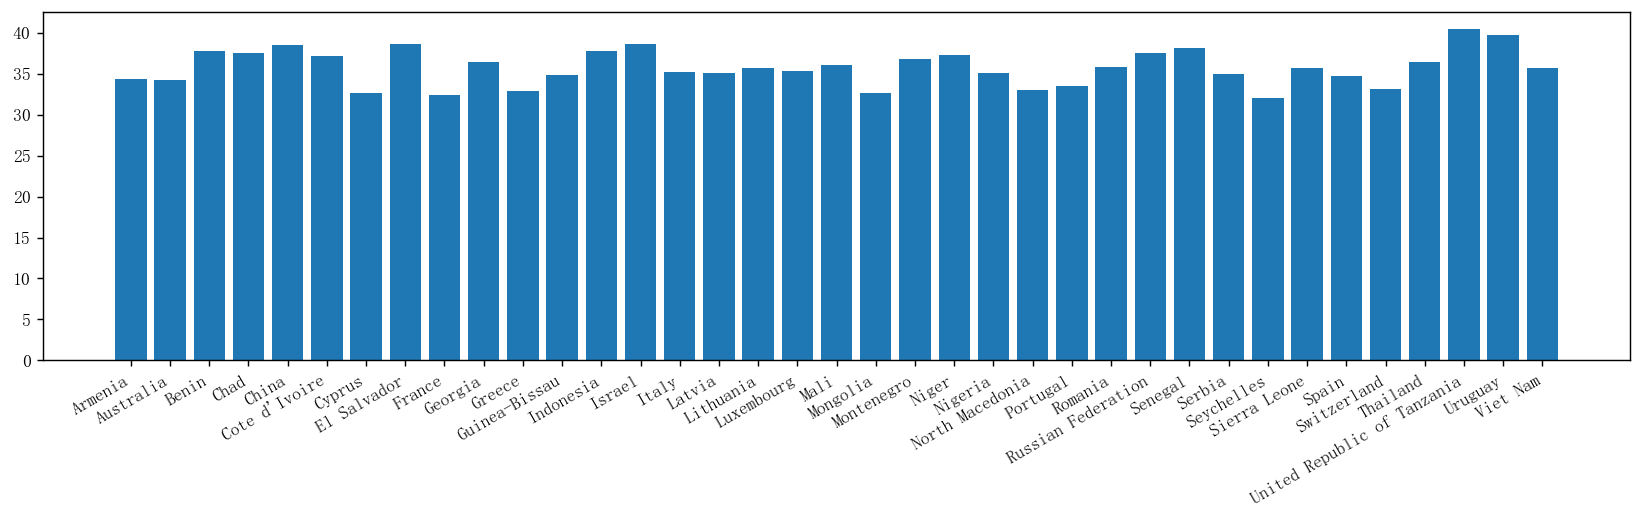

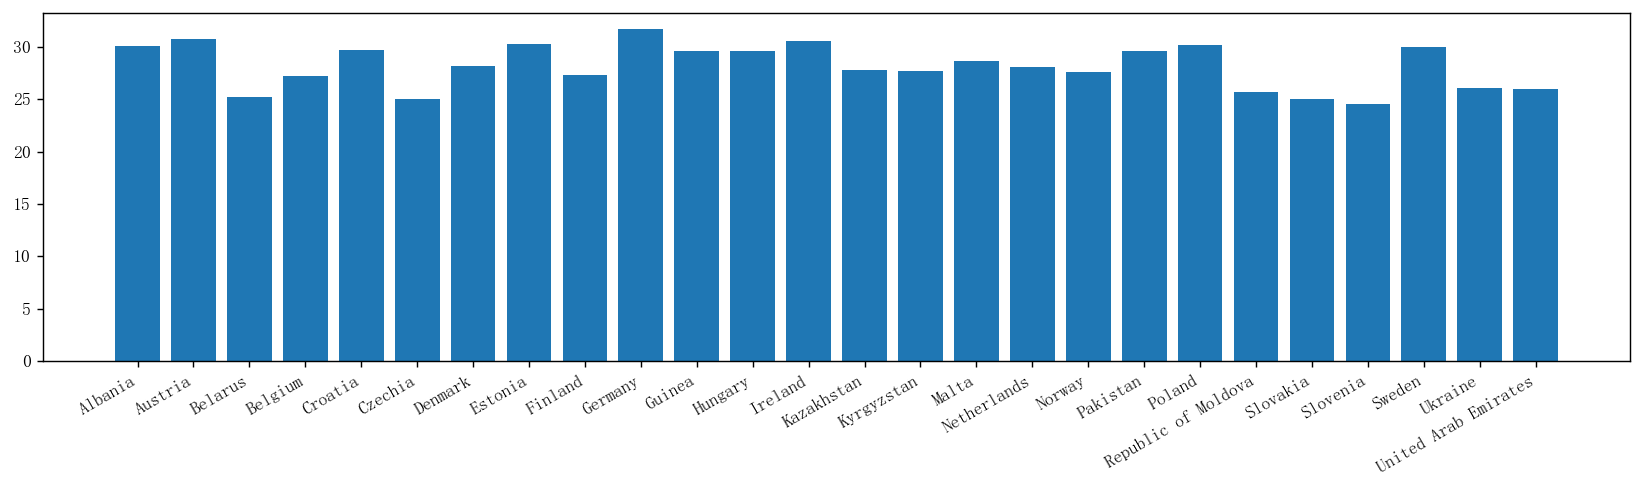

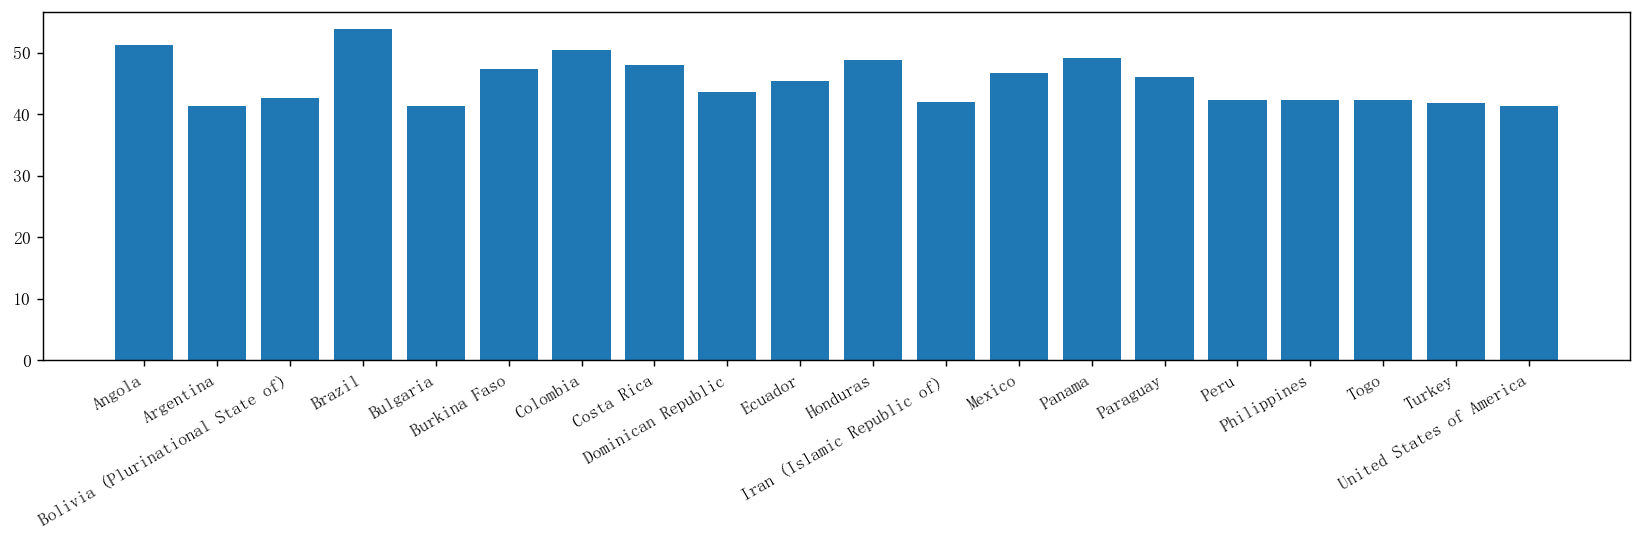

In [117]:
from sklearn.cluster import KMeans

k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
 
kmeans.fit(gini.reshape(-1, 1))

predictions = kmeans.predict(gini.reshape(-1, 1))

for i in range(k):
    fig = plt.figure(dpi=128, figsize=(16, 4))
    plt.bar(country[predictions == i], gini[predictions == i])
    fig.autofmt_xdate()


分成了三种类别，可按照分类结果图进行分析

#### 建边的三个要素按照比例得到edge矩阵

### AHP权重确定：
#### step 1:（参考图片）
目标层：确定三者（value, corr, similarity）权重

准则层：对SDG内容概括的全面性、针对性、准确性

方案层：value, corr, similarity

#### step 2:
确定每个评价标准下的重要性打分，以及评价标准的重要性打分（判断矩阵）：

In [118]:
judge_matrix = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
pd.DataFrame(judge_matrix, columns=['全面性', '针对性', '准确性'], index=['全面性', '针对性', '准确性'])

,全面性,针对性,准确性
全面性,1,1,1
针对性,1,1,1
准确性,1,1,1


In [119]:
# 判断矩阵的一致性检验：
eigenvalue, featurevector = np.linalg.eig(judge_matrix)
lambda_max = np.max(eigenvalue)
n = 3
CI = (lambda_max - n) / (n - 1)
RI = 0.52 # 查找对应的《平均随机一致性指标RI》
CR = CI / RI
CR # CR = 0， CR小于0.1可认为判断矩阵一致性可以接受，检验通过

0.0

In [120]:
matrix1 = np.array([[1, 1/2, 1/4], [2, 1, 1/2], [4, 2, 1]]) # 全面性 similaruty>corr>value
weight1 = np.apply_along_axis(func1d=lambda x: x / np.sum(x), axis=0, arr=matrix1)
weight1 = np.apply_along_axis(func1d=lambda x: np.mean(x), axis=1, arr=weight1)
print(weight1)
pd.DataFrame(matrix1, columns=['value', 'corr', 'similarity'], index=['value', 'corr', 'similarity'])

[0.14285714 0.28571429 0.57142857]


,value,corr,similarity
value,1.0,0.5,0.25
corr,2.0,1.0,0.50
similarity,4.0,2.0,1.00


In [121]:
matrix2 = np.array([[1, 2, 2], [1/2, 1, 1], [1/2, 1, 1]]) # 针对性 value>similarity=corr
weight2 = np.apply_along_axis(func1d=lambda x: x / np.sum(x), axis=0, arr=matrix2)
weight2 = np.apply_along_axis(func1d=lambda x: np.mean(x), axis=1, arr=weight2)
print(weight2)
pd.DataFrame(matrix2, columns=['value', 'corr', 'similarity'], index=['value', 'corr', 'similarity'])

[0.5  0.25 0.25]


,value,corr,similarity
value,1.0,2.0,2.0
corr,0.5,1.0,1.0
similarity,0.5,1.0,1.0


In [122]:
matrix3 = np.array([[1, 2, 2], [1/2, 1, 1], [1/2, 1, 1]]) # 准确性 value＞corr＞similarity
weight3 = np.apply_along_axis(func1d=lambda x: x / np.sum(x), axis=0, arr=matrix3)
weight3 = np.apply_along_axis(func1d=lambda x: np.mean(x), axis=1, arr=weight3)
print(weight3)
pd.DataFrame(matrix3, columns=['value', 'corr', 'similarity'], index=['value', 'corr', 'similarity'])

[0.5  0.25 0.25]


,value,corr,similarity
value,1.0,2.0,2.0
corr,0.5,1.0,1.0
similarity,0.5,1.0,1.0


In [123]:
df_ = pd.DataFrame(np.array([weight1, weight2, weight3]), columns=['value', 'corr', 'similarity'], index=['Comprehensiveness', 'Targeted', 'Accuracy'])
weight = df_.apply(np.mean, axis=0)
weight

value         0.380952
corr          0.261905
similarity    0.357143
dtype: float64

In [124]:
def scale(x):
    return (x - np.nanmin(x)) / (np.nanmax(x) - np.nanmin(x))

edge = weight[0] * scale(value_arr) + weight[1] * (real_corr) + weight[2] * (arr)
for i in range(17):
    edge[i][i] = 0
pd.DataFrame(edge, columns=names, index=names)

,No poverty,Zero Hunger,Good Health,Quality Education,Gender Equality,Sanitation,Energy,Economic Growth,Infrastructure,Inequalities,Sustainable cities,Consumption,Climate,Life Under Water,Life on Land,good governance,Partnerships
No poverty,0.000000,0.012720,NaN,0.324356,NaN,-0.105823,0.348994,NaN,0.323088,0.433485,0.346460,0.325864,-0.119693,0.322708,0.384047,-0.083807,NaN
Zero Hunger,0.013947,0.000000,NaN,-0.102652,-0.069996,0.384527,-0.030474,0.426023,-0.049483,NaN,NaN,-0.029410,0.400226,-0.044805,-0.026441,NaN,NaN
Good Health,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.361449,NaN,NaN,NaN,NaN,NaN,0.374159
Quality Education,0.328032,-0.062173,NaN,0.000000,0.429738,-0.083852,0.424368,0.011798,0.439669,NaN,NaN,0.397452,-0.122672,0.354235,0.323137,NaN,NaN
Gender Equality,NaN,-0.067452,NaN,0.429834,0.000000,-0.063084,NaN,NaN,0.371844,NaN,NaN,0.357901,-0.070400,NaN,NaN,NaN,NaN
Sanitation,-0.041887,0.444566,NaN,-0.023592,-0.002920,0.000000,0.034662,0.467116,0.024251,-0.040149,NaN,0.051178,0.459310,0.025454,-0.027994,0.490796,NaN
Energy,0.342221,-0.038476,NaN,0.413919,NaN,-0.036047,0.000000,NaN,0.424781,0.317677,0.392545,0.444089,-0.076130,0.436323,0.373249,-0.018477,NaN
Economic Growth,NaN,0.477553,NaN,0.060763,NaN,0.455938,NaN,0.000000,NaN,NaN,NaN,0.100491,0.422228,0.092166,0.020700,NaN,NaN
Infrastructure,0.351152,-0.022648,NaN,0.464089,0.396136,-0.011621,0.459618,NaN,0.000000,0.329665,NaN,0.484447,-0.023651,NaN,0.334183,NaN,NaN
Inequalities,0.589644,NaN,NaN,NaN,NaN,0.052073,0.480609,NaN,0.457760,0.000000,0.549169,0.510633,NaN,0.489032,0.548932,0.087651,0.463865


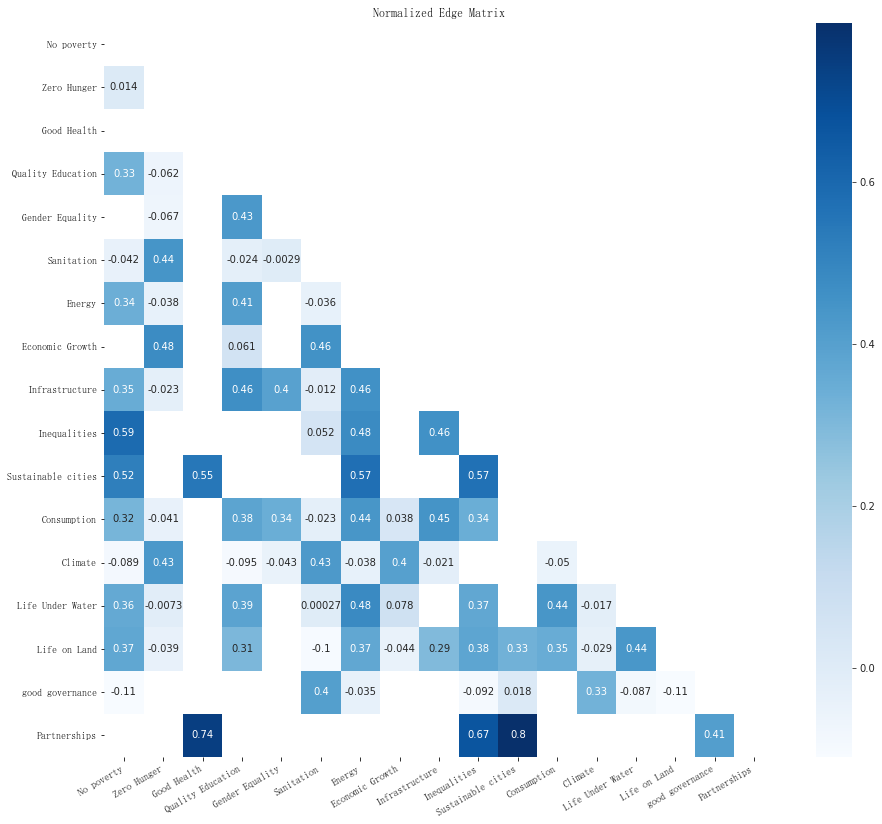

In [125]:
def HeatMap(DataFrame):
    
    import seaborn as sns
    colormap = plt.cm.hsv
    ylabels = DataFrame.columns.values.tolist()
    f, ax = plt.subplots(figsize=(15, 15))
    ax.set_title('Normalized Edge Matrix')
    mask = np.zeros_like(DataFrame)
    mask[np.triu_indices_from(mask)] = True  # True:上三角矩阵 False:方阵
 
    with sns.axes_style("white"):
        sns.heatmap(DataFrame,
                    cmap="Blues", # 可选: Greys, Purples, Blues, Greens, Oranges, Reds, YlOrBr, ... ,
                    annot=True,
                    mask=mask,
                    )
    f.autofmt_xdate()

HeatMap(pd.DataFrame(edge, columns=names, index=names))
plt.savefig('aaa.jpg')

#### edge矩阵进行标准化，得到最终的edge矩阵：
结果的调整：对行做标准化（例如行0，假如SDG1的value下降了1，对周围的辐射总和不能超过1），否则矩阵的自传递将是一个是一个自膨胀系统

标准化的方法是，对于SDGi，如果连接了k个$SDG_j$，则对于同一行的每个辐射值除以k

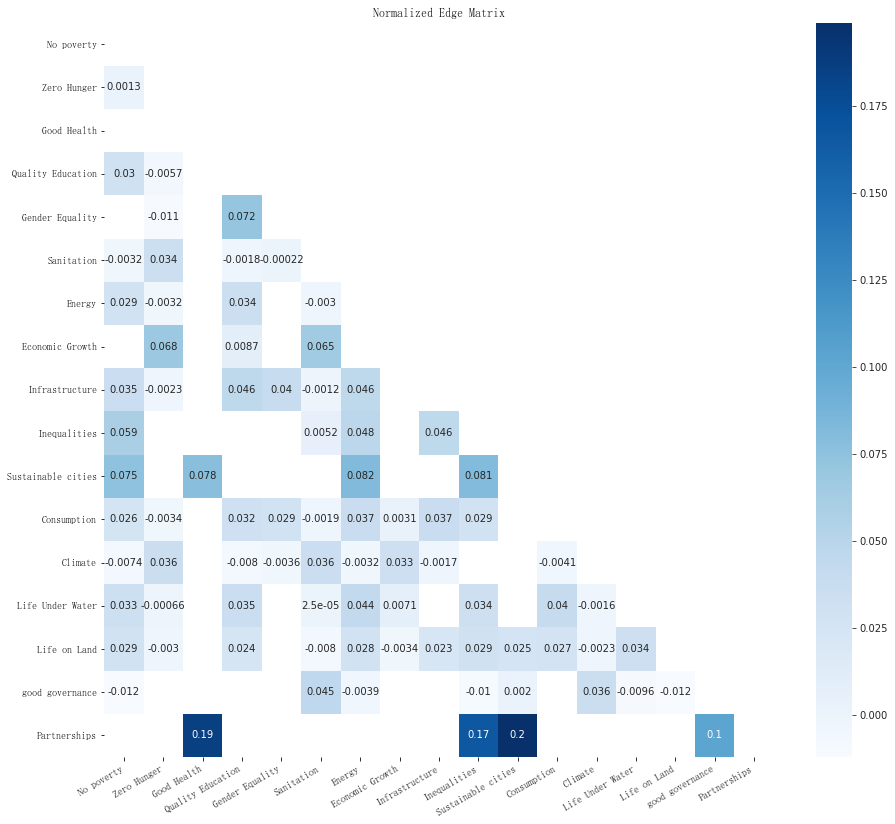

In [126]:
edge = np.apply_along_axis(func1d=lambda x: (x / (17 - (sum(np.isnan(x)) + 1))), axis=1, arr=edge)
pd.DataFrame(edge, columns=names, index=names)
HeatMap(pd.DataFrame(edge, columns=names, index=names))
plt.savefig('aaa.jpg')

In [127]:
pd.DataFrame(edge).to_csv('matrix.csv')

# 2

Use the individual SDGs, as well as the structure of your network, to set priorities that 
can most efficiently move the work of the UN forward

#### 图的流动：
由于题目中有“资金限制”，现对于联合国和其他国家的财力做一定限制假设，假设一年的财力资源可以至多解决一个问题的10%，或者多个问题（但总和不超过10%），i = 0, 1, 2..., 16，依次实验，做出折线图，寻找i使得解决i的时候value总和最小

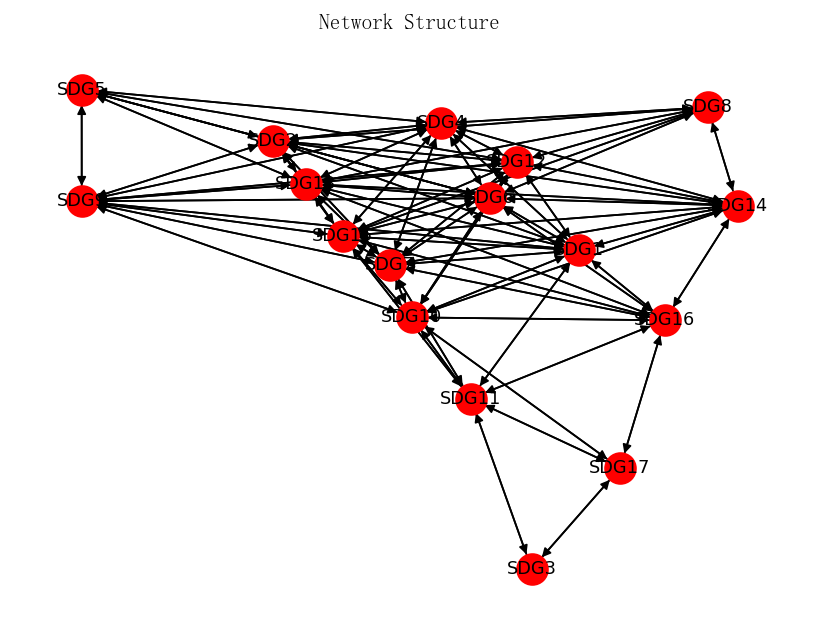

[ 15.1603301   16.44974788   5.69849047  17.60354429  17.71957608
  48.13921561  11.69994278  42.5778346   29.80387227  91.00837399
  99.35585869  10.45275541  31.42858335  35.23084651   9.25424944
   1.6546795  176.02875747]


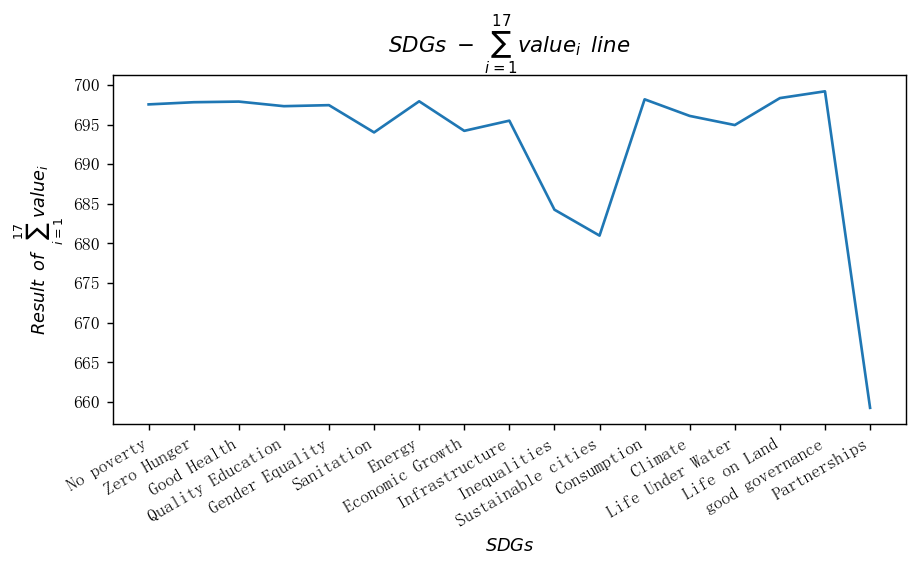

In [128]:
sum_list = []

percentage = 0.1

vertex_list = [('SDG' + str(i + 1)) for i in range(17)]

edge_list = []

for i in range(edge.shape[0]):
    for j in range(edge.shape[1]):
        if (i != j) and np.isnan(edge)[i][j] == False:
            edge_list.append(tuple(['SDG' + str(i + 1), 'SDG' + str(j + 1)]))
            
draw_net(vertex_list, edge_list, 'Network Structure')  # 作图



for i in range(17): # 假设图的流动是从i 开始的（也即最优先去解决SDGi），之后去记录结束时候的value的总和，在不同i下确定使得value总和最小的最优解i

    value = [15.82845047, 16.45081949, 10.05025103, 17.69212932, 17.74135749, 48.25421134, 12.39294267, 42.58506202, 30.06107444, 95.02563012, 104.64372261, 10.746764,
31.50222957, 35.48243554, 9.91130964, 4.01674227, 197.22222222]
    
    for j in range(12): # 以月为最小单位，每月进行一次流动，影响到其他的节点

        if j == 0: # 最初的第一天

            _ = value[i] * (percentage)  # 人工解决了百分比
            value[i] -= _
            change = np.where(np.isnan(edge[i] * _), 0, edge[i] * _)

        else:

            change = change @ np.where(np.isnan(edge), 0, edge)

        value -= change

        value = np.where(value <= 0, 0, value)


    sum_list.append(np.sum(value))

print(value)

fig = plt.figure(dpi=128, figsize=(8, 4))
plt.plot(names, sum_list)
plt.xlabel("$SDGs$")
plt.ylabel("$Result$ $of$ $\sum_{i=1}^{17}value_i$")
plt.title('$SDGs$ $-$ $\sum_{i=1}^{17}value_i$ $line$')
fig.autofmt_xdate()

minimize $\sum_{i=1}^{17}value_i$, 于是优先次序为：
['Partnerships',
'Sustainable cities',
....

#### 关于percentage的灵敏度检验：
#### percentage为假设中联合国每年可以解决的所有问题百分比和的上限，例如percentage=0.1：
#### 可能是解决一个问题的10%，也可能是每个问题1%，2%，1%，...，加起来为10%，这样假设的原因是资金是有限的
#### 现在令percentage从0.1到1，进行灵敏度观察与检验

Text(0.5, 1.0, '$percentage$ $-$ $\\sum_{i=1}^{17}value_i$ $line$')

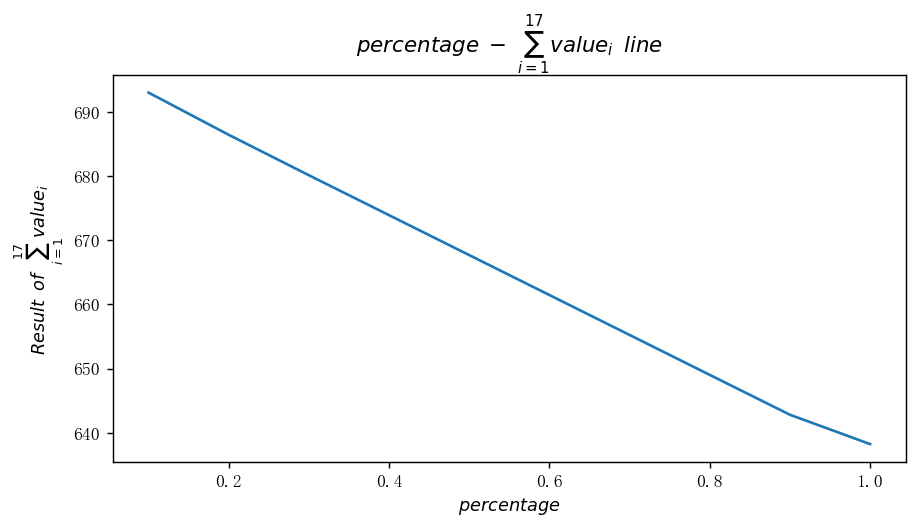

In [129]:
percentage_list = []

per = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

vertex_list = [('SDG' + str(i + 1)) for i in range(17)]

edge_list = []

for percentage in per:
    sum_list = []
    for i in range(17): # 假设图的流动是从i 开始的（也即最优先去解决SDGi），之后去记录结束时候的value的总和，在不同i下确定使得value总和最小的最优解i

        value = [15.82845047, 16.45081949, 10.05025103, 17.69212932, 17.74135749, 48.25421134, 12.39294267, 42.58506202, 30.06107444, 95.02563012, 104.64372261, 10.746764,
    31.50222957, 35.48243554, 9.91130964, 4.01674227, 197.22222222]

        for j in range(12): # 以月为最小单位，每月进行一次流动，影响到其他的节点

            if j == 0: # 最初的第一天

                _ = value[i] * (percentage)  # 人工解决了百分比
                value[i] -= _
                change = np.where(np.isnan(edge[i] * _), 0, edge[i] * _)

            else:

                change = change @ np.where(np.isnan(edge), 0, edge)

            value -= change

            value = np.where(value <= 0, 0, value)


        sum_list.append(np.sum(value))

    percentage_list.append(np.mean(sum_list))

fig = plt.figure(dpi=128, figsize=(8, 4))
plt.plot(per, percentage_list)
plt.xlabel("$percentage$")
plt.ylabel("$Result$ $of$ $\sum_{i=1}^{17}value_i$")
plt.title('$percentage$ $-$ $\sum_{i=1}^{17}value_i$ $line$')

#### 结论：系统节点紧迫性的和是随着percentage几乎呈现线性变化的（虽然不是完全的线性），因为投资比例的增加自然会减少系统问题的紧迫性，随着投资比例呈大致线性的变化

How did you evaluate the effectiveness of each priority?

#### 评估：
1.系统向好的方向发展

2.利用了系统的作用（比人工的10%的解决力有一个超额）

In [130]:
# How did you evaluate the effectiveness of each priority?

value = [15.82845047, 16.45081949, 10.05025103, 17.69212932, 17.74135749, 48.25421134, 12.39294267, 42.58506202, 30.06107444, 95.02563012, 104.64372261, 10.746764,
31.50222957, 35.48243554, 9.91130964, 4.01674227, 197.22222222]
sum_0 = np.sum(np.array(value)) 
print('value和的初始值为:' + str(sum_0))
print('应用优先的策略后，value和的值为:' + str(sum_list[-1]))
print('对于整个系统而言，总体的紧迫性会有显著的减小，也即对于整个系统而言在往好的方向发展，并且减小的百分比约为(699.60735424 - 587.6285002503605) / 699.60735424 = 0.1600596')
print('而实际上，人工解决了10%，16%>10%，有一个超额的好处')

value和的初始值为:699.60735424
应用优先的策略后，value和的值为:363.98406150946244
对于整个系统而言，总体的紧迫性会有显著的减小，也即对于整个系统而言在往好的方向发展，并且减小的百分比约为(699.60735424 - 587.6285002503605) / 699.60735424 = 0.1600596
而实际上，人工解决了10%，16%>10%，有一个超额的好处


What could be reasonable to achieve in the next 10 years if 
your priorities are initiated?

#### strategy：每年在初始时刻解决多个问题，这些问题人工解决程度总和为10%，解决的比例与紧迫程度成正比，紧迫程度和花多少钱无关，不是越紧迫就花钱越多！！

In [131]:
value = np.array([15.82845047, 16.45081949, 10.05025103, 17.69212932, 17.74135749, 48.25421134, 12.39294267, 42.58506202, 30.06107444, 95.02563012, 104.64372261, 10.746764,
31.50222957, 35.48243554, 9.91130964, 4.01674227, 197.22222222])

month_list = []

for yr in range(10): # 10年

    for j in range(12): # 12个月每个月考虑一次流动

        if j == 0 and yr == 0: # 1年1月，只考虑人工，不考虑系统的自传递影响
            
            prop = 0.1 * (value / np.sum(value))  # 每个节点人工解决的百分比 = 10%的总可用 * 紧急程度配比
            
            change = value * prop # 解决了多少

            value -= change

        elif j == 0 and yr != 0: # 1月，但不是第一年，考虑人工，也考虑去年12月积累的系统的自传递影响
            
            change = change @ np.where(np.isnan(edge), 0, edge) # 多对多的影响

            value -= change
            
            prop = 0.1 * (value / np.sum(value))  # 每个节点人工解决的百分比 = 10%的总可用 * 紧急程度配比
            
            change = value * prop # 解决了多少

            value -= change
            
        else: # 从2-12月
        
            change = change @ np.where(np.isnan(edge), 0, edge) # 多对多的影响

            value -= change

        value = np.where(value <= 0, 0, value) # 防止负数溢出


        month_list.append(sum(value))
        
    print('第{0}年value:'.format(yr + 1))
    print([np.round(i, 1) for i in value])
    print(sum(value))

第1年value:
[15.3, 16.4, 8.6, 17.6, 17.7, 47.9, 11.9, 42.3, 29.8, 92.4, 101.4, 10.5, 31.3, 35.1, 9.5, 3.2, 191.0]
681.7794527155902
第2年value:
[14.9, 16.3, 7.3, 17.4, 17.6, 47.5, 11.4, 42.0, 29.4, 89.8, 98.3, 10.3, 31.1, 34.8, 9.0, 2.5, 185.0]
664.5433470666327
第3年value:
[14.4, 16.2, 5.9, 17.3, 17.5, 47.1, 11.0, 41.7, 29.1, 87.3, 95.2, 10.1, 30.9, 34.4, 8.6, 1.8, 179.2]
647.8733142673925
第4年value:
[14.0, 16.2, 4.7, 17.2, 17.5, 46.7, 10.6, 41.4, 28.9, 84.9, 92.3, 9.8, 30.7, 34.1, 8.2, 1.1, 173.6]
631.7447413085708
第5年value:
[13.6, 16.1, 3.4, 17.1, 17.4, 46.2, 10.1, 41.1, 28.6, 82.6, 89.5, 9.6, 30.5, 33.7, 7.8, 0.4, 168.3]
616.1341250283406
第6年value:
[13.2, 16.0, 2.3, 17.0, 17.3, 45.8, 9.7, 40.8, 28.3, 80.4, 86.8, 9.4, 30.3, 33.4, 7.4, 0.0, 163.1]
601.2563549316162
第7年value:
[12.8, 15.9, 1.2, 16.8, 17.3, 45.4, 9.3, 40.5, 28.0, 78.2, 84.2, 9.2, 30.1, 33.0, 7.0, 0.0, 158.2]
587.243515669732
第8年value:
[12.4, 15.8, 0.1, 16.7, 17.2, 45.0, 9.0, 40.2, 27.7, 76.1, 81.7, 9.0, 29.9, 32.7, 6.7, 0.0, 1

可见，所有的问题都是呈紧迫性下降的，总的系统也不断在改善，health等问题已经被解决

#### 作图反应月份与总紧迫程度的关系

Text(0.5, 1.0, '$month$ $-$ $\\sum_{i=1}^{17}value_i$ $curve$')

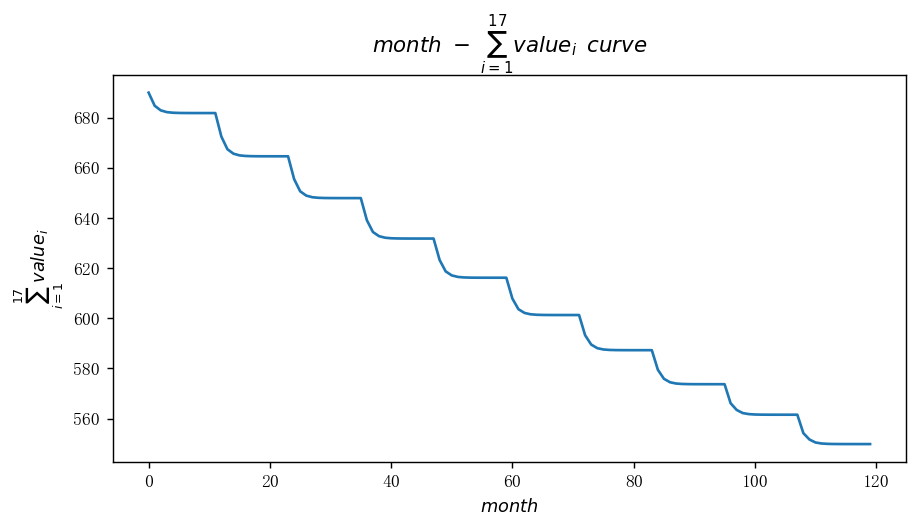

In [132]:
fig = plt.figure(dpi=128, figsize=(8, 4))
plt.plot(month_list)
plt.xlabel("$month$")
plt.ylabel("$\sum_{i=1}^{17}value_i$")
plt.title('$month$ $-$ $\sum_{i=1}^{17}value_i$ $curve$')

#### 这个曲线反应了在每年的起初首先人力发挥作用，之后在短暂的几个月内，系统会自动产生作用并推动其向好发展，呈现一个类似周期性的减少趋势##

# 3

If one of the SDGs is achieved (for example, there is no poverty or no hunger), what 
would be the structure of the resulting network?

#### 假如没有贫穷了，SDG1解决（把第三行的i=0换成1，2，... ,16可以显示没有SDGi时的结果）：

第1年value:
[11.0, 15.7, 0.0, 16.4, 17.1, 44.3, 7.5, 39.7, 27.0, 68.5, 72.1, 8.4, 29.6, 31.8, 5.3, 0.0, 134.8]
529.3121666753729
第2年value:
[7.9, 14.9, 0.0, 15.3, 16.3, 40.0, 4.4, 36.5, 24.4, 51.1, 51.8, 6.7, 27.5, 28.7, 2.4, 0.0, 96.3]
424.0549971063122
第3年value:
[5.8, 13.9, 0.0, 14.3, 15.6, 35.8, 2.3, 33.1, 22.1, 39.4, 38.7, 5.4, 25.3, 25.9, 0.4, 0.0, 71.7]
349.6781836738119
第4年value:
[4.3, 12.9, 0.0, 13.3, 14.7, 31.7, 0.8, 29.7, 20.1, 31.2, 29.9, 4.5, 23.1, 23.3, 0.0, 0.0, 55.1]
294.68262254044794
第5年value:
[3.2, 12.0, 0.0, 12.4, 13.9, 27.9, 0.0, 26.4, 18.3, 25.2, 23.6, 3.7, 20.9, 21.0, 0.0, 0.0, 43.5]
251.92675131313035
第6年value:
[2.4, 11.0, 0.0, 11.5, 13.0, 24.5, 0.0, 23.4, 16.5, 20.7, 19.1, 3.0, 18.8, 18.9, 0.0, 0.0, 35.0]
217.78004174380175
第7年value:
[1.7, 10.1, 0.0, 10.6, 12.1, 21.4, 0.0, 20.7, 15.0, 17.2, 15.6, 2.4, 16.9, 16.9, 0.0, 0.0, 28.6]
189.37838121127126
第8年value:
[1.2, 9.3, 0.0, 9.8, 11.3, 18.7, 0.0, 18.2, 13.5, 14.5, 12.9, 2.0, 15.1, 15.2, 0.0, 0.0, 23.7]
165.3479411873

Text(0.5, 1.0, '$SDGs$ $-$ $value$ $(when$ $there$ $is$ $no$ $poverty)$')

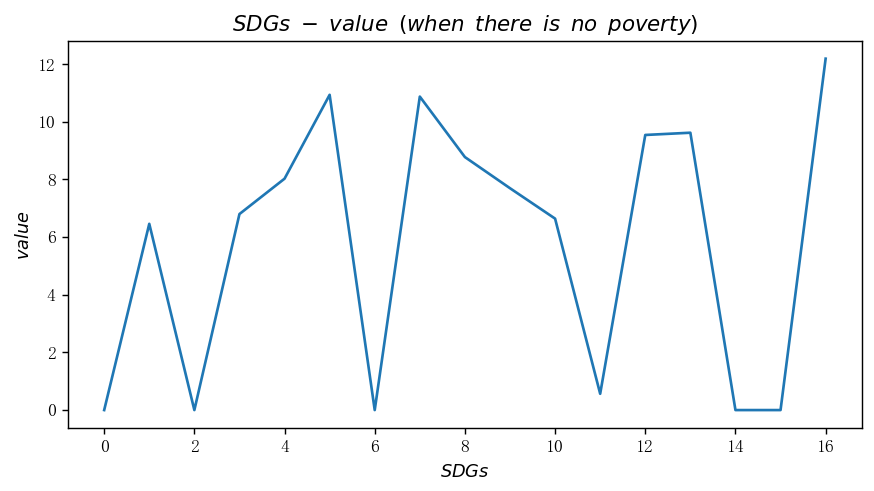

In [173]:
value = np.array([15.82845047, 16.45081949, 10.05025103, 17.69212932, 17.74135749, 48.25421134, 12.39294267, 42.58506202, 30.06107444, 95.02563012, 104.64372261, 10.746764,
31.50222957, 35.48243554, 9.91130964, 4.01674227, 197.22222222])

month_list = []
percentage = 1

for yr in range(12): # 10年

    for j in range(12): # 12个月每个月考虑一次流动

        if j == 0 and yr == 0: # 1年1月，只考虑人工，不考虑系统的自传递影响
            
            prop = percentage * (value / np.sum(value))  # 每个节点人工解决的百分比 = 10%的总可用 * 紧急程度配比
            
            change = value * prop # 解决了多少

            value -= change

        elif j == 0 and yr != 0: # 1月，但不是第一年，考虑人工，也考虑去年12月积累的系统的自传递影响
            
            change = change @ np.where(np.isnan(edge), 0, edge) # 多对多的影响

            value -= change
            
            prop = percentage * (value / np.sum(value))  # 每个节点人工解决的百分比 = 10%的总可用 * 紧急程度配比
            
            change = value * prop # 解决了多少

            value -= change
            
        else: # 从2-12月
        
            change = change @ np.where(np.isnan(edge), 0, edge) # 多对多的影响

            value -= change

        value = np.where(value <= 0, 0, value) # 防止负数溢出


        month_list.append(sum(value))
    print('第{0}年value:'.format(yr + 1))
    print([np.round(i, 1) for i in value])
    print(sum(value))
    if value[0] == 0:
        break
fig = plt.figure(dpi=128, figsize=(8, 4))
plt.plot(value)
plt.xlabel("$SDGs$")
plt.ylabel("$value$")
plt.title('$SDGs$ $-$ $value$ $(when$ $there$ $is$ $no$ $poverty)$')


679.1314550448203
[  0.          14.29258082   3.86410571  14.88628193  15.70990146
  43.00169349   8.1751803   37.98243485  25.62759973  79.77708213
  87.73764266   7.88821398  28.06094163  30.58938154   6.16619739
   0.75772923 174.57752789]


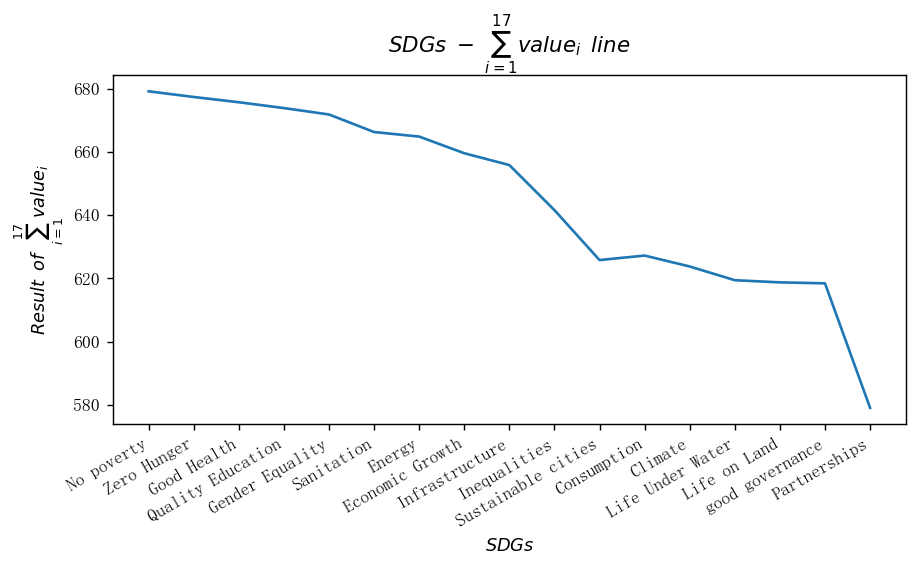

In [133]:
value = np.array([15.82845047, 16.45081949, 10.05025103, 17.69212932, 17.74135749, 48.25421134, 12.39294267, 42.58506202, 30.06107444, 95.02563012, 104.64372261, 10.746764,
31.50222957, 35.48243554, 9.91130964, 4.01674227, 197.22222222])
i = 0 # 贫穷被解决对应SDG1，i=0，..., 16

index = i # 保存

for j in range(12): # 以月为最小单位，每月进行一次流动，影响到其他的节点

    if j == 0: # 最初的第一天

        _ = value[i] * (1)  # 已经解决了100%
        value[i] -= _
        change = np.where(np.isnan(edge[i] * _), 0, edge[i] * _)

    else:

        change = change @ np.where(np.isnan(edge), 0, edge)

    value -= change

    value = np.where(value <= 0, 0, value)
    
print(sum(value))

# 收敛到一个新的value列表，进入正式的初始状态：

# 为了确定在贫穷被解决情况下的优先级，再次对17种状态跑循环，作图找到min的状态：

new_state = value

sum_list = []

for i in range(17): # 假设图的流动是从i 开始的（也即最优先去解决SDGi），之后去记录结束时候的value的总和，在不同i下确定使得value总和最小的最优解i

    value = new_state
    
    for j in range(12): # 以月为最小单位，每月进行一次流动，影响到其他的节点

        if j == 0: # 最初的第一月

            _ = value[i] * (0.1)  # 人工解决了10%
            value[i] -= _
            value[index] = 0
            change = np.where(np.isnan(edge[i] * _), 0, edge[i] * _)

        else:
            
            value[index] = 0
            change = change @ np.where(np.isnan(edge), 0, edge)
        
        value -= change

        value = np.where(value <= 0, 0, value)


    sum_list.append(np.sum(value))

print(value)

fig = plt.figure(dpi=128, figsize=(8, 4))
plt.plot(names, sum_list)
plt.xlabel("$SDGs$")
plt.ylabel("$Result$ $of$ $\sum_{i=1}^{17}value_i$")
plt.title('$SDGs$ $-$ $\sum_{i=1}^{17}value_i$ $line$')
fig.autofmt_xdate()

#### 可见，优先级发生了变化，新的优先级顺序为：
 'Partnerships',
 'good governance',
 'Life on Land',
 'Life Under Water',
 'Climate',
 'Sustainable cities',
 'Consumption',
 'Inequalities',
 'Infrastructure',
 'Economic Growth',
 'Energy',
 'Sanitation',
 'Gender Equality',
 'Quality Education',
 'Good Health',
 'Zero Hunger',
 'No poverty'

同理，假如没有饥饿了，SDG2解决了，把上述代码中 i=0 改为 i=1 ,结果与上述结论类似

Are there other goals that should be included or proposed to the 
UN for inclusion?

#### 新增topic1（数据安全），topic2（老龄化）

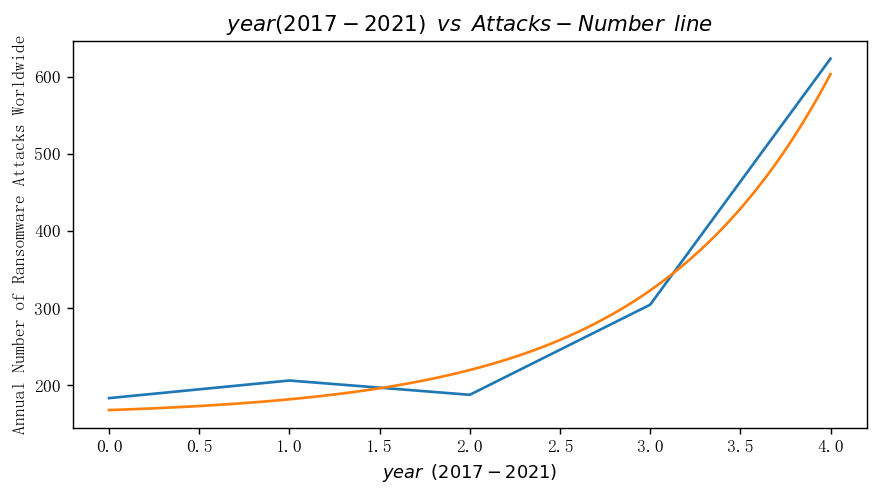

In [134]:
# topic1：数据安全
from scipy.optimize import leastsq

t1 = np.array([183.6, 206.4, 187.9, 304.6, 623.3]) # 17 - 21
fig = plt.figure(dpi=128, figsize=(8, 4))
plt.xlabel("$year$ $(2017-2021)$")
plt.ylabel("Annual Number of Ransomware Attacks Worldwide")
plt.plot(t1)

plt.title('$year(2017-2021)$ $vs$ $Attacks-Number$ $line$')
x = np.linspace(0, 4, 100)
y = 160 + 60 * np.exp((x - 2))
plt.plot(x, y)

#### 上图橙色为指数拟合curve，数据安全严峻程度逐年增加且增速上升

Text(0.5, 1.0, '$year(2016-2021)$ $vs$ $proportion$ $line$')

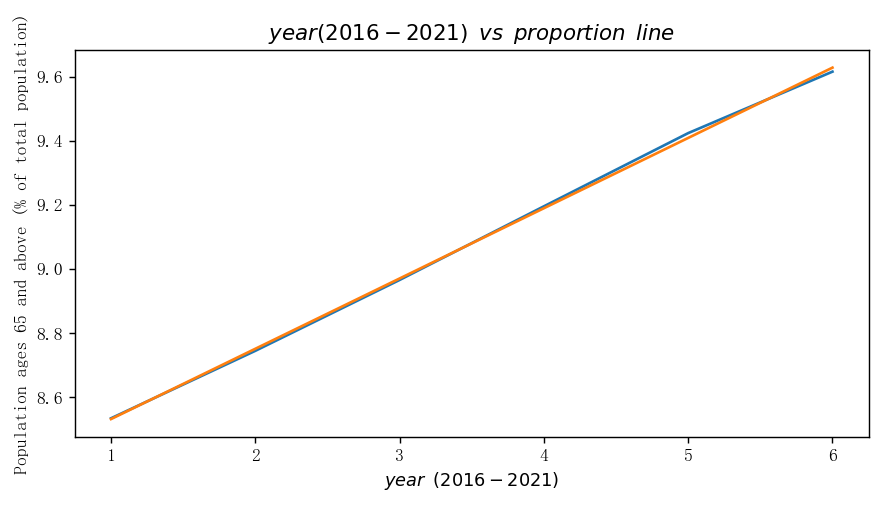

In [135]:
# topic2：老龄化人口比例
from sklearn.linear_model import LinearRegression
t2 = np.array([8.534842044, 8.745477217, 8.966736932, 9.196582939, 9.425143158, 9.617039391]) # 16 - 21

lr = LinearRegression()
lr.fit(np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1), t2)
#lr.predict(np.array([7]).reshape(-1, 1))
fig = plt.figure(dpi=128, figsize=(8, 4))
k = lr.coef_[0]
b = lr.intercept_
plt.plot(np.array([1, 2, 3, 4, 5, 6]), t2)
plt.plot(np.array([1, 2, 3, 4, 5, 6]), np.array([1, 2, 3, 4, 5, 6]) * k + b)
plt.xlabel("$year$ $(2016-2021)$")
plt.ylabel("Population ages 65 and above (% of total population)")
plt.title('$year(2016-2021)$ $vs$ $proportion$ $line$')

#### 上图橙色为simple linear regression结果，老龄化严峻程度逐年增加

#### 加入“数据安全”与“老龄化”之后，对图进行测试，再次探索优先级（具体操作步骤与上面一样，只不过加了两个节点）：

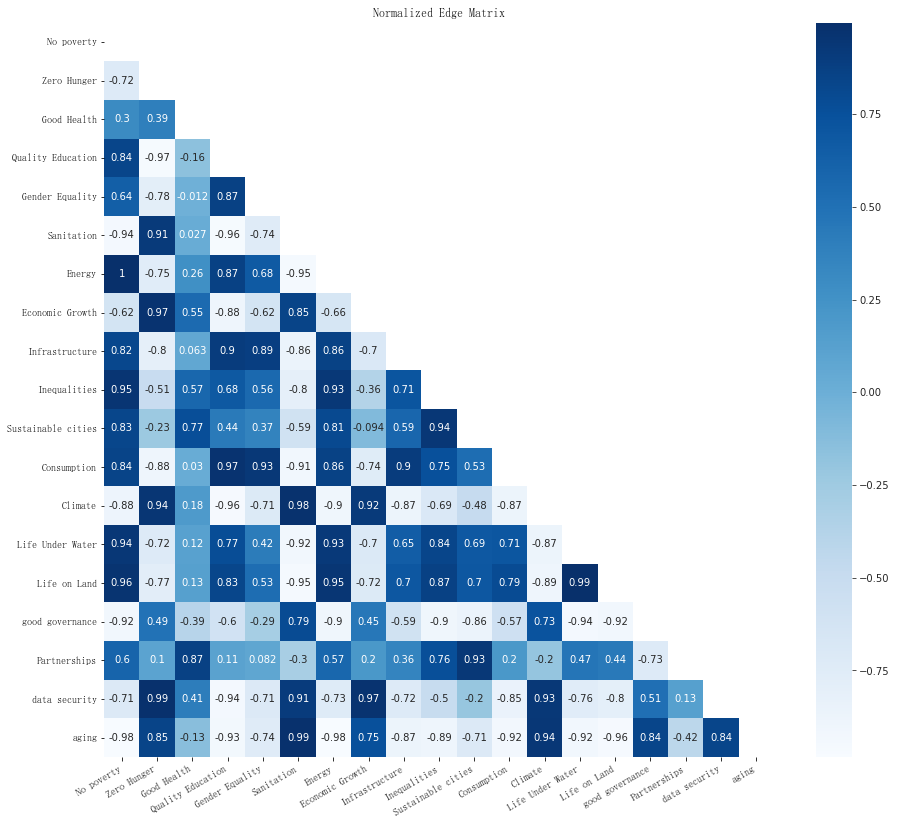

In [149]:
# 测试新加入的效果：

# point
value = [15.82845047, 16.45081949, 10.05025103, 17.69212932, 17.74135749, 48.25421134, 12.39294267, 42.58506202, 30.06107444, 95.02563012, 104.64372261, 10.746764,
31.50222957, 35.48243554, 9.91130964, 4.01674227, 197.22222222]
new_value = value
new_value.extend([min(value)] * 2)
new_names = names + ['data security', 'aging']

# edge

mat1 = np.zeros([len(new_value), len(new_value)])
for i in range(len(new_value)):
    for j in range(len(new_value)):
        mat1[i][j] = np.round(new_value[i], 3)
        
df = pd.read_excel('data.xlsx')
df = df.apply(lambda x: x / np.mean(x), axis=0)
lst18 = np.array([183.6, 206.4, 187.9, 304.6, 623.3])
lst19 = np.array([8.534842044, 8.745477217, 8.966736932, 9.196582939, 9.425143158])
data = df.iloc[[16, 17, 18, 19, 20]]
positive = [1, 2, 10, 13, 16, 18, 19] # 18: 网络安全，越大越紧迫, 19: 老龄化，越大越紧迫
negative = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 17]

mat2 = np.zeros([19, 19])
data['SDG18'] = lst18 / np.mean(lst18)
data['SDG19'] = lst19 / np.mean(lst19)
for i in range(1, 20):
    for j in range(1, 20):
        x = data['SDG' + str(i)].values
        y = data['SDG' + str(j)].values
        sample_cov = sum([(i - np.mean(x)) * (j - np.mean(y)) for i, j in zip(x, y)]) / 4
        corr = sample_cov / (np.std(x, ddof = 1) * np.std(y, ddof = 1))
        if (i in positive and j in negative) or (j in positive and i in negative):
            corr = - corr
        mat2[i-1][j-1] = corr

        
df = pd.DataFrame(mat2, columns=new_names, index=new_names)
HeatMap(df)
threshold = 0.5
mat2 = np.where((np.abs(mat2) > threshold), mat2, np.nan)

        
from sentence_transformers import SentenceTransformer, util

# Download model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# The sentences we'd like to compute similarity about
sentences = [
'End poverty in all its forms everywhere.',
'End hunger, achieve food security and improved nutrition and promote sustainable agriculture.',
'Ensure healthy lives and promote well-being for all at all ages.',
'Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all.',
'Achieve gender equality and empower all women and girls.',
'Ensure availability and sustainable management of water and sanitation for all.',
'Ensure access to affordable, reliable, sustainable and modern energy for all.',
'Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all.',
'Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation.',
'Reduce inequality within and among countries.',
'Make cities and human settlements inclusive, safe, resilient and sustainable.',
'Ensure sustainable consumption and production patterns.',
'Take urgent action to combat climate change and its impacts.',
'Conserve and sustainably use the oceans, seas and marine resources for sustainable development.',
'Protect, restore and promote sustainable use of terrestrial ecosystems, sustainably manage forests, combat desertification, and halt and reverse land degradation and halt biodiversity loss.',
'Promote peaceful and inclusive societies for sustainable development, provide access to justice for all and build effective, accountable and inclusive institutions at all levels.',
'Strengthen the means of implementation and revitalize the Global Partnership for Sustainable Development.',
'protecting digital data, such as those in a database, from destructive forces and from the unwanted actions of unauthorized users,such as a cyberattack or a data breach.',
'aging is the process of becoming older. The term refers humans are potentially biologically immortal.'
]

# Get embeddings of sentences
embeddings = model.encode(sentences)

# Compute similarities
import numpy as np
mat3 = np.zeros([19, 19])
for i in range(19):
    for j in range(19):
        sim = util.cos_sim(embeddings[i], embeddings[j])
        num = "{0:.4f}".format(sim.tolist()[0][0])
        mat3[i][j] = num


        
def scale(x):
    return (x - np.nanmin(x)) / (np.nanmax(x) - np.nanmin(x))

new_edge = 0.3 * scale(mat1) + 0.4 * (mat2) + 0.3 * (mat3)
new_edge = np.apply_along_axis(func1d=lambda x: (x / (17 - (sum(np.isnan(x)) + 1))), axis=1, arr=new_edge)
for i in range(19):
    new_edge[i][i] = 0

In [179]:
pd.DataFrame(new_edge)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,-0.008369,NaN,0.028176,0.024076,-0.017327,0.031455,-0.008388,0.027903,0.035975,0.029326,0.028371,-0.017788,0.029235,0.032930,-0.015862,0.021654,-0.016204,-0.023303
1,-0.010381,0.000000,NaN,-0.022843,-0.017031,0.041165,-0.013871,0.044251,-0.015731,-0.005944,NaN,-0.015584,0.042083,-0.014328,-0.013533,NaN,NaN,0.035947,0.031766
2,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.196100,NaN,0.160545,0.221153,NaN,NaN,NaN,NaN,NaN,0.235650,NaN,NaN
3,0.032734,-0.020938,NaN,0.000000,0.039805,-0.018880,0.039362,-0.012286,0.041190,0.028247,NaN,0.039254,-0.022046,0.033652,0.032596,-0.002015,NaN,-0.025578,-0.025081
4,0.033101,-0.018397,NaN,0.047049,0.000000,-0.017002,0.034102,-0.009810,0.042889,0.029772,NaN,0.042574,-0.017491,NaN,0.024594,NaN,NaN,-0.021324,-0.024158
5,-0.014969,0.038812,NaN,-0.014142,-0.009974,0.000000,-0.010490,0.038925,-0.010519,-0.013042,-0.001273,-0.009463,0.040019,-0.010632,-0.014615,0.039341,NaN,0.034359,0.032256
6,0.031099,-0.011517,NaN,0.033565,0.024455,-0.013503,0.000000,-0.006023,0.034256,0.029564,0.031645,0.035177,-0.015389,0.035486,0.032279,-0.011908,0.025645,-0.015845,-0.022741
7,-0.007023,0.047632,0.036893,-0.010089,-0.005778,0.044678,-0.003621,0.000000,-0.003221,NaN,NaN,-0.004670,0.043660,-0.007164,-0.011647,NaN,NaN,0.038363,0.031129
8,0.031475,-0.011974,NaN,0.039619,0.035065,-0.012537,0.038662,-0.004150,0.000000,0.029704,0.034235,0.040638,-0.012854,0.031942,0.029620,-0.000162,NaN,-0.015205,-0.019469
9,0.047329,0.003620,0.032360,0.034807,0.031964,-0.007855,0.040841,NaN,0.036909,0.000000,0.044532,0.039793,-0.004677,0.039644,0.043744,-0.008021,0.037085,NaN,-0.014220


In [190]:
k = 0
for i in range(new_edge.shape[0]):
    for j in range(new_edge.shape[1]):
        if np.isnan(new_edge[i][j]) == False:
            print("{\"id\": \"" + str(k) + "\", \"source\": \"" + str(i) + "\", \"target\": \"" + str(j) + "\"},")
            k += 1

{"id": "0", "source": "0", "target": "0"},
{"id": "1", "source": "0", "target": "1"},
{"id": "2", "source": "0", "target": "3"},
{"id": "3", "source": "0", "target": "4"},
{"id": "4", "source": "0", "target": "5"},
{"id": "5", "source": "0", "target": "6"},
{"id": "6", "source": "0", "target": "7"},
{"id": "7", "source": "0", "target": "8"},
{"id": "8", "source": "0", "target": "9"},
{"id": "9", "source": "0", "target": "10"},
{"id": "10", "source": "0", "target": "11"},
{"id": "11", "source": "0", "target": "12"},
{"id": "12", "source": "0", "target": "13"},
{"id": "13", "source": "0", "target": "14"},
{"id": "14", "source": "0", "target": "15"},
{"id": "15", "source": "0", "target": "16"},
{"id": "16", "source": "0", "target": "17"},
{"id": "17", "source": "0", "target": "18"},
{"id": "18", "source": "1", "target": "0"},
{"id": "19", "source": "1", "target": "1"},
{"id": "20", "source": "1", "target": "3"},
{"id": "21", "source": "1", "target": "4"},
{"id": "22", "source": "1", "targ

In [137]:
sum_list = []

for i in range(19): # 假设图的流动是从i 开始的（也即最优先去解决SDGi），之后去记录结束时候的value的总和，在不同i下确定使得value总和最小的最优解i

    new_value = [15.82845047, 16.45081949, 10.05025103, 17.69212932, 17.74135749, 48.25421134, 12.39294267, 42.58506202, 30.06107444, 95.02563012, 104.64372261, 10.746764,
31.50222957, 35.48243554, 9.91130964, 4.01674227, 197.22222222, 4.01674227, 4.01674227]
    
    for j in range(12): # 以月为最小单位，每月进行一次流动，影响到其他的节点

        if j == 0: # 最初的第一天

            _ = new_value[i] * (0.1)  # 人工解决了10%
            new_value[i] -= _
            change = np.where(np.isnan(new_edge[i] * _), 0, new_edge[i] * _)

        else:

            change = change @ np.where(np.isnan(new_edge), 0, new_edge)

        new_value -= change

        new_value = np.where(new_value <= 0, 0, new_value)

    sum_list.append(np.sum(new_value))

print(new_value)


[ 15.84605384  16.43619203  10.05153732  17.70827655  17.75416422
  48.2381163   12.41041143  42.57262441  30.07649287  95.0418299
 104.65582816  10.7636053   31.48547352  35.49750035   9.92815282
   4.00376936 197.22488844   4.00124204   3.60895694]


#### new_value的最后两项即“数据安全”与“老龄化”，紧迫程度从之前的4.017，4.017变为4.00124204，3.60895694，也即在系统中受益，也得到了改善

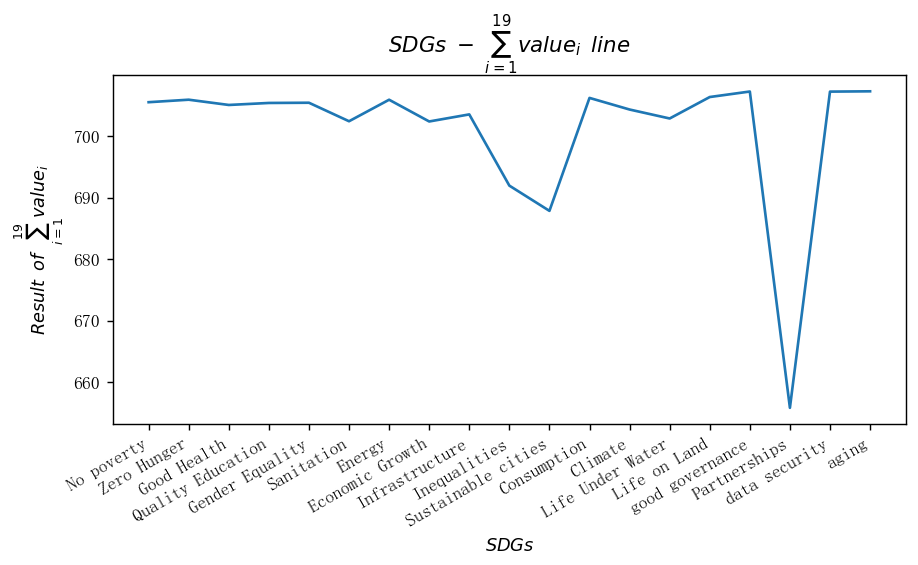

In [138]:
fig = plt.figure(dpi=128, figsize=(8, 4))
plt.plot(new_names, sum_list)
plt.xlabel("$SDGs$")
plt.ylabel("$Result$ $of$ $\sum_{i=1}^{19}value_i$")
plt.title('$SDGs$ $-$ $\sum_{i=1}^{19}value_i$ $line$')
fig.autofmt_xdate()

#### 优先级结果可以由下面得出(从小到大排一下)：

In [139]:
[(i, j) for i, j in zip(new_names, sum_list)]

[('No poverty', 705.5347244832413),
 ('Zero Hunger', 705.9412935246222),
 ('Good Health', 705.0854543931312),
 ('Quality Education', 705.4113877688615),
 ('Gender Equality', 705.4471034951235),
 ('Sanitation', 702.4388978919335),
 ('Energy', 705.935462080121),
 ('Economic Growth', 702.4004109324343),
 ('Infrastructure', 703.5512633353387),
 ('Inequalities', 691.9731346469332),
 ('Sustainable cities', 687.8706460899284),
 ('Consumption', 706.2321964994544),
 ('Climate', 704.3436354311018),
 ('Life Under Water', 702.8868643013835),
 ('Life on Land', 706.3753922476566),
 ('good governance', 707.2710665161687),
 ('Partnerships', 655.8519145409455),
 ('data security', 707.2550572813461),
 ('aging', 707.3051157848059)]

# 4

Discuss the impact of technological advances, global pandemics, climate change, 
regional wars, and refugee movements, or other international crises on your team’s 
network and your team’s choice of priorities. What are the significant effects on the 
progress of the UN from a network perspective? 

语义相似度分析，如果是好事情，确定每个的相似度，按一定比例促进他们的解决，如果是坏事情，确定相似度后加重他们的紧迫性即可

In [140]:
new_topic = ['technological advances', 'global pandemics', 'climate change', 'regional wars', 'refugee movements', 'international crises']

In [141]:
# part3 similarity 30%
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util

# Download model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# The sentences we'd like to compute similarity about
sentences = [
'End poverty in all its forms everywhere.',
'End hunger, achieve food security and improved nutrition and promote sustainable agriculture.',
'Ensure healthy lives and promote well-being for all at all ages.',
'Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all.',
'Achieve gender equality and empower all women and girls.',
'Ensure availability and sustainable management of water and sanitation for all.',
'Ensure access to affordable, reliable, sustainable and modern energy for all.',
'Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all.',
'Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation.',
'Reduce inequality within and among countries.',
'Make cities and human settlements inclusive, safe, resilient and sustainable.',
'Ensure sustainable consumption and production patterns.',
'Take urgent action to combat climate change and its impacts.',
'Conserve and sustainably use the oceans, seas and marine resources for sustainable development.',
'Protect, restore and promote sustainable use of terrestrial ecosystems, sustainably manage forests, combat desertification, and halt and reverse land degradation and halt biodiversity loss.',
'Promote peaceful and inclusive societies for sustainable development, provide access to justice for all and build effective, accountable and inclusive institutions at all levels.',
'Strengthen the means of implementation and revitalize the Global Partnership for Sustainable Development.'
]
sentences.extend(new_topic)
names = ['No poverty', 'Zero Hunger', 'Good Health', 'Quality Education', 'Gender Equality', 'Sanitation', 'Energy', 'Economic Growth', 'Infrastructure', 'Inequalities', 'Sustainable cities', 'Consumption', 'Climate', 'Life Under Water', 'Life on Land', 'good governance', 'Partnerships']

# Get embeddings of sentences
embeddings = model.encode(sentences)

# Compute similarities
import numpy as np
arr = np.zeros([len(new_topic)+17, len(new_topic)+17])
for i in range(len(new_topic)+17):
    for j in range(len(new_topic)+17):
        sim = util.cos_sim(embeddings[i], embeddings[j])
        num = "{0:.4f}".format(sim.tolist()[0][0])
        arr[i][j] = num
names.extend(new_topic)
pd.DataFrame(arr, columns=names, index=names)


,No poverty,Zero Hunger,Good Health,Quality Education,Gender Equality,Sanitation,Energy,Economic Growth,Infrastructure,Inequalities,...,Life Under Water,Life on Land,good governance,Partnerships,technological advances,global pandemics,climate change,regional wars,refugee movements,international crises
No poverty,1.0000,0.4823,0.3472,0.2263,0.2876,0.3254,0.1820,0.3514,0.2355,0.4680,...,0.1527,0.3071,0.3715,0.2224,0.1068,0.2573,0.1961,0.0795,0.1761,0.2560
Zero Hunger,0.4823,1.0000,0.4047,0.3118,0.2961,0.3644,0.3833,0.4136,0.3771,0.3724,...,0.3280,0.4207,0.4068,0.3553,0.1561,0.2896,0.3033,0.0589,0.0876,0.2017
Good Health,0.3472,0.4047,1.0000,0.5720,0.3946,0.4016,0.5743,0.5410,0.4071,0.2751,...,0.3830,0.1790,0.6036,0.3831,0.1319,0.1379,0.2059,-0.1073,0.0806,-0.0243
Quality Education,0.2263,0.3118,0.5720,1.0000,0.4959,0.3938,0.4801,0.5764,0.5144,0.2430,...,0.3545,0.2316,0.6417,0.4926,0.1711,0.0301,0.1102,0.0096,0.0721,-0.0199
Gender Equality,0.2876,0.2961,0.3946,0.4959,1.0000,0.2875,0.2786,0.3966,0.3168,0.2709,...,0.1634,0.1301,0.5173,0.2834,0.0564,-0.0111,0.1240,0.0454,0.1047,0.0380
Sanitation,0.3254,0.3644,0.4016,0.3938,0.2875,1.0000,0.5511,0.4559,0.4317,0.2310,...,0.4962,0.3525,0.5525,0.4784,0.1346,0.1600,0.2020,-0.0390,-0.0477,0.1441
Energy,0.1820,0.3833,0.5743,0.4801,0.2786,0.5511,1.0000,0.5320,0.5214,0.1889,...,0.4968,0.3048,0.5626,0.4732,0.2840,0.2119,0.3017,-0.0337,-0.0818,0.0681
Economic Growth,0.3514,0.4136,0.5410,0.5764,0.3966,0.4559,0.5320,1.0000,0.5985,0.4093,...,0.4482,0.2922,0.6688,0.5319,0.2511,0.1864,0.2064,0.0631,0.0344,0.1246
Infrastructure,0.2355,0.3771,0.4071,0.5144,0.3168,0.4317,0.5214,0.5985,1.0000,0.2987,...,0.4869,0.3117,0.6472,0.6950,0.3946,0.2514,0.3001,0.1236,0.0424,0.2178
Inequalities,0.4680,0.3724,0.2751,0.2430,0.2709,0.2310,0.1889,0.4093,0.2987,1.0000,...,0.2605,0.4110,0.3532,0.2455,0.1257,0.3120,0.2527,0.2474,0.1185,0.2851


In [142]:
names = ['No poverty', 'Zero Hunger', 'Good Health', 'Quality Education', 'Gender Equality', 'Sanitation', 'Energy', 'Economic Growth', 'Infrastructure', 'Inequalities', 'Sustainable cities', 'Consumption', 'Climate', 'Life Under Water', 'Life on Land', 'good governance', 'Partnerships']
new_arr = arr[17:, :17]
pd.DataFrame(new_arr, columns=names, index=new_topic)

,No poverty,Zero Hunger,Good Health,Quality Education,Gender Equality,Sanitation,Energy,Economic Growth,Infrastructure,Inequalities,Sustainable cities,Consumption,Climate,Life Under Water,Life on Land,good governance,Partnerships
technological advances,0.1068,0.1561,0.1319,0.1711,0.0564,0.1346,0.2840,0.2511,0.3946,0.1257,0.1516,0.3023,0.2626,0.2202,0.0916,0.1273,0.3514
global pandemics,0.2573,0.2896,0.1379,0.0301,-0.0111,0.1600,0.2119,0.1864,0.2514,0.3120,0.1778,0.2418,0.3768,0.1088,0.2069,0.1909,0.2664
climate change,0.1961,0.3033,0.2059,0.1102,0.1240,0.2020,0.3017,0.2064,0.3001,0.2527,0.2696,0.3178,0.7210,0.3490,0.3928,0.1589,0.3322
regional wars,0.0795,0.0589,-0.1073,0.0096,0.0454,-0.0390,-0.0337,0.0631,0.1236,0.2474,0.2219,0.0473,0.2222,0.0839,0.2638,0.1265,0.1471
refugee movements,0.1761,0.0876,0.0806,0.0721,0.1047,-0.0477,-0.0818,0.0344,0.0424,0.1185,0.2103,-0.0773,0.1936,0.0322,0.1070,0.1379,0.0390
international crises,0.2560,0.2017,-0.0243,-0.0199,0.0380,0.1441,0.0681,0.1246,0.2178,0.2851,0.2272,0.1174,0.2906,0.1384,0.1808,0.2066,0.2444


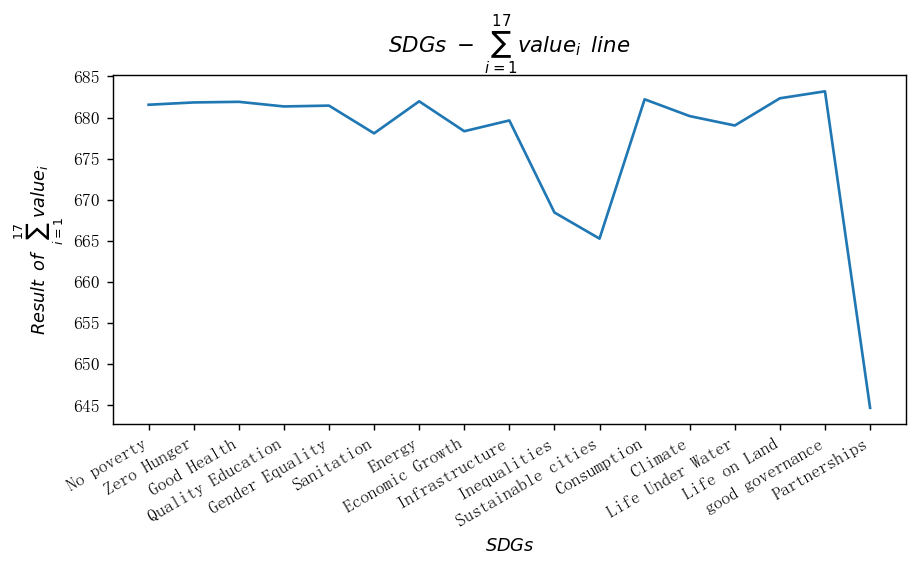

In [143]:
index = 0 # technological advances，其他类似，i = 1，2，3，4，5即可

sum_list = []

for i in range(17): # 假设图的流动是从i 开始的（也即最优先去解决SDGi），之后去记录结束时候的value的总和，在不同i下确定使得value总和最小的最优解i

    value = np.array([15.82845047, 16.45081949, 10.05025103, 17.69212932, 17.74135749, 48.25421134, 12.39294267, 42.58506202, 30.06107444, 95.02563012, 104.64372261, 10.746764,
31.50222957, 35.48243554, 9.91130964, 4.01674227, 197.22222222])
    
    k = 0.1 # 为参数,可变成1,,,
    
    value = (value + k*new_arr[index] * value) if index != 0 else (value - k*new_arr[index] * value) # index=0科技进步是好事情，对应减小紧迫性，index：1-5都是增大紧迫性

    for j in range(12): # 以月为最小单位，每月进行一次流动，影响到其他的节点

        if j == 0: # 最初的第一天

            _ = value[i] * (0.1)  # 人工解决了10%
            
            value[i] -= _
            
            change = np.where(np.isnan(edge[i] * _), 0, edge[i] * _)

        else:

            change = change @ np.where(np.isnan(edge), 0, edge)

        value -= change

        value = np.where(value <= 0, 0, value)


    sum_list.append(np.sum(value))

fig = plt.figure(dpi=128, figsize=(8, 4))
plt.plot(names, sum_list)
plt.xlabel("$SDGs$")
plt.ylabel("$Result$ $of$ $\sum_{i=1}^{17}value_i$")
plt.title('$SDGs$ $-$ $\sum_{i=1}^{17}value_i$ $line$')
fig.autofmt_xdate()

#### 优先性可依照如下得到：

In [144]:
list(zip(names, sum_list))

[('No poverty', 681.5573634102817),
 ('Zero Hunger', 681.8369484034986),
 ('Good Health', 681.9123958437104),
 ('Quality Education', 681.3496963594066),
 ('Gender Equality', 681.4513699679148),
 ('Sanitation', 678.0760374612419),
 ('Energy', 681.9737865551376),
 ('Economic Growth', 678.3347463834222),
 ('Infrastructure', 679.6453091055788),
 ('Inequalities', 668.4473394464451),
 ('Sustainable cities', 665.2670620084803),
 ('Consumption', 682.2180929463807),
 ('Climate', 680.1737557781535),
 ('Life Under Water', 679.0322724522487),
 ('Life on Land', 682.3424323350821),
 ('good governance', 683.1912115123233),
 ('Partnerships', 644.6794397044678)]

可见变化较大：网络的结构、priority，从网络角度看，影响了联合国问题解决的次序，也改变了难易程度

# 5

Discuss how your network approach may help other companies and organizations set 
priorities of their goals. 

可以利用网络方法，分析问题重要程度来建立点，通过分析关联性等因素来建边，以及决定如何去解决问题，即问题解决的优先度

In [145]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
CurrentConfig.ONLINE_HOST = 'C:/Users/11592/Desktop/2023ICM/'
from pyecharts import options as opts
from pyecharts.charts import Graph

In [146]:
pd.DataFrame(edge)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.001060,NaN,0.027030,NaN,-0.008819,0.029083,NaN,0.026924,0.036124,0.028872,0.027155,-0.009974,0.026892,0.032004,-0.006984,NaN
1,0.001268,0.000000,NaN,-0.009332,-0.006363,0.034957,-0.002770,0.038729,-0.004498,NaN,NaN,-0.002674,0.036384,-0.004073,-0.002404,NaN,NaN
2,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180724,NaN,NaN,NaN,NaN,NaN,0.187079
3,0.029821,-0.005652,NaN,0.000000,0.039067,-0.007623,0.038579,0.001073,0.039970,NaN,NaN,0.036132,-0.011152,0.032203,0.029376,NaN,NaN
4,NaN,-0.011242,NaN,0.071639,0.000000,-0.010514,NaN,NaN,0.061974,NaN,NaN,0.059650,-0.011733,NaN,NaN,NaN,NaN
5,-0.003222,0.034197,NaN,-0.001815,-0.000225,0.000000,0.002666,0.035932,0.001865,-0.003088,NaN,0.003937,0.035332,0.001958,-0.002153,0.037754,NaN
6,0.028518,-0.003206,NaN,0.034493,NaN,-0.003004,0.000000,NaN,0.035398,0.026473,0.032712,0.037007,-0.006344,0.036360,0.031104,-0.001540,NaN
7,NaN,0.068222,NaN,0.008680,NaN,0.065134,NaN,0.000000,NaN,NaN,NaN,0.014356,0.060318,0.013167,0.002957,NaN,NaN
8,0.035115,-0.002265,NaN,0.046409,0.039614,-0.001162,0.045962,NaN,0.000000,0.032966,NaN,0.048445,-0.002365,NaN,0.033418,NaN,NaN
9,0.058964,NaN,NaN,NaN,NaN,0.005207,0.048061,NaN,0.045776,0.000000,0.054917,0.051063,NaN,0.048903,0.054893,0.008765,0.046387
